In [36]:
import pandas as pd
import numpy as np
import seaborn as sns
import cv2
import os
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import keras

In [2]:
eng_lrg = pd.read_csv('data/raw_files/DataFrames/English_large.csv')
eng = pd.read_csv('data/raw_files/DataFrames/English.csv')

In [6]:
print(eng_lrg.sample())
print(eng.sample())

       label                                             path
401334     W  handwriting_kaggle/dataset/W/train_57_02359.png
                   image label
2393  Img/img044-029.png     h


In [7]:
# change order and name of columns so that both dataframes have the same columns and can be combined later

eng = eng[['label', 'image']]
eng.columns = ['label', 'path']

In [10]:
# update path to new location of images in the folder

eng.path = [val.replace('Img', 'data/raw_files/Images/Img') for val in eng.path]
eng_lrg.path = [val.replace('handwriting_kaggle', 'data/raw_files/Images') for val in eng_lrg.path]

In [11]:
print(eng_lrg.sample())
print(eng.sample())

       label                                               path
315999     q  data/raw_files/Images/dataset/q/train_71_00381...
     label                                      path
2608     l  data/raw_files/Images/Img/img048-024.png


Text(0.5, 1.0, 'Label: 2')

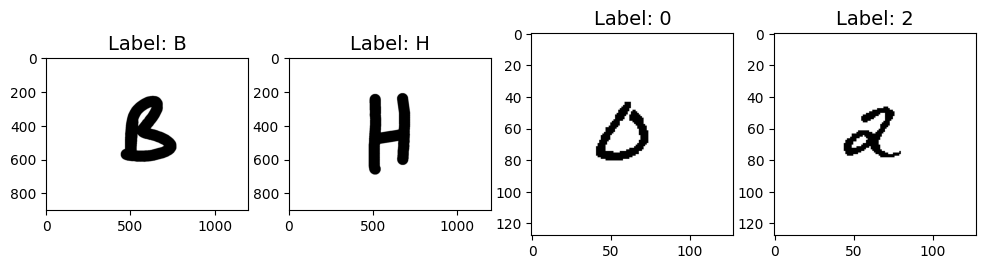

In [21]:
# check paths and labels 

fig, ax = plt.subplots(nrows=1, ncols=4, figsize=(12, 5))
ax[0].imshow(cv2.imread(eng['path'].iloc[650]))
ax[0].set_title(f'Label: {eng.label.iloc[650]}', fontsize=14)
ax[1].imshow(cv2.imread(eng['path'].iloc[950]))
ax[1].set_title(f'Label: {eng.label.iloc[950]}', fontsize=14)
ax[2].imshow(cv2.imread(eng_lrg['path'].iloc[6500]))
ax[2].set_title(f'Label: {eng_lrg.label.iloc[6500]}', fontsize=14)
ax[3].imshow(cv2.imread(eng_lrg['path'].iloc[20500]))
ax[3].set_title(f'Label: {eng_lrg.label.iloc[20500]}', fontsize=14)

In [22]:
# check image sizes

print('eng dataframe original image dimensions:')
print(cv2.imread(eng['path'].iloc[100]).shape)
print(' ')
print('eng_lrg dataframe original image dimensions:')
print(cv2.imread(eng_lrg['path'].iloc[100]).shape)

eng dataframe original image dimensions:
(900, 1200, 3)
 
eng_lrg dataframe original image dimensions:
(128, 128, 3)


In [23]:
# check dataframe sizes

print('eng dataframe size:')
print(eng.shape)
print(' ')
print('eng_lrg dataframe size:')
print(eng_lrg.shape)

eng dataframe size:
(3410, 2)
 
eng_lrg dataframe size:
(425122, 2)


In [28]:
# combine the dataframes

label_path_df = pd.concat([eng, eng_lrg])

In [30]:
# check new dataframe 

print('new dataframe size:', label_path_df.shape)
print('any nulls?', label_path_df.isnull().sum().sum())
label_path_df.sample()

new dataframe size: (428532, 2)
any nulls? 0


,label,path
32406,3,data/raw_files/Images/dataset/3/train_33_08305...


In [31]:
# save dataframe

label_path_df.to_csv('data/processed_files/DataFrames/label_path_df.csv', index=False)

In [46]:
# inspect labels

print('labels include:', list(label_path_df.label.unique()))
print('number of different labels:', len(list(label_path_df.label.unique())))
print('distribution of labels:')
label_value_counts = label_path_df.label.value_counts(10).reset_index().sort_values('label', ascending=False)
label_value_counts

labels include: ['0', '1', '2', '3', '4', '5', '6', '7', '8', '9', 'A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 'L', 'M', 'N', 'O', 'P', 'Q', 'R', 'S', 'T', 'U', 'V', 'W', 'X', 'Y', 'Z', 'a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i', 'j', 'k', 'l', 'm', 'n', 'o', 'p', 'q', 'r', 's', 't', 'u', 'v', 'w', 'x', 'y', 'z']
number of different labels: 62
distribution of labels:


,index,label
0,o,0.039682
1,U,0.030084
2,c,0.029979
3,i,0.029970
4,S,0.029760
...,...,...
51,v,0.000128
50,w,0.000128
49,x,0.000128
48,y,0.000128


In [43]:
# labels are not evenly distributed - make sure to stratify test and train

In [47]:
# import and edit images from path column to prepare them for the dataframe
# first, make sure everything is working

Text(0.5, 1.0, 'layer 3')

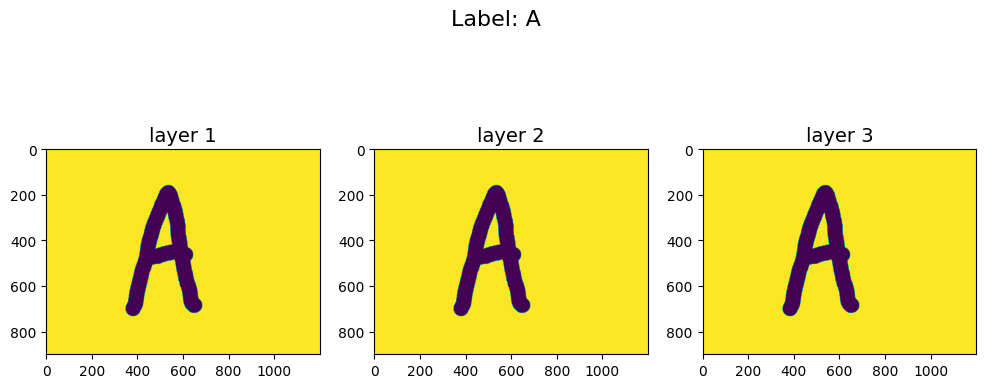

In [71]:
test_image_1 = cv2.imread(label_path_df['path'].iloc[600])
layer_1, layer_2, layer_3 = cv2.split(test_image_1)

# check if all layers are the same 
fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(12, 5))
plt.suptitle(f'Label: {label_path_df.label.iloc[600]}', fontsize=16)
ax[0].imshow(layer_1)
ax[0].set_title('layer 1', fontsize=14)
ax[1].imshow(layer_2)
ax[1].set_title('layer 2', fontsize=14)
ax[2].imshow(layer_3)
ax[2].set_title('layer 3', fontsize=14)

In [72]:
# check if layers are the same. If they are, I will only include one layer in the dataframe:
print(layer_1.shape == layer_2.shape == layer_3.shape)
print(layer_1.sum() == layer_2.sum() == layer_3.sum())

True
True


Text(0.5, 1.0, 'layer 3')

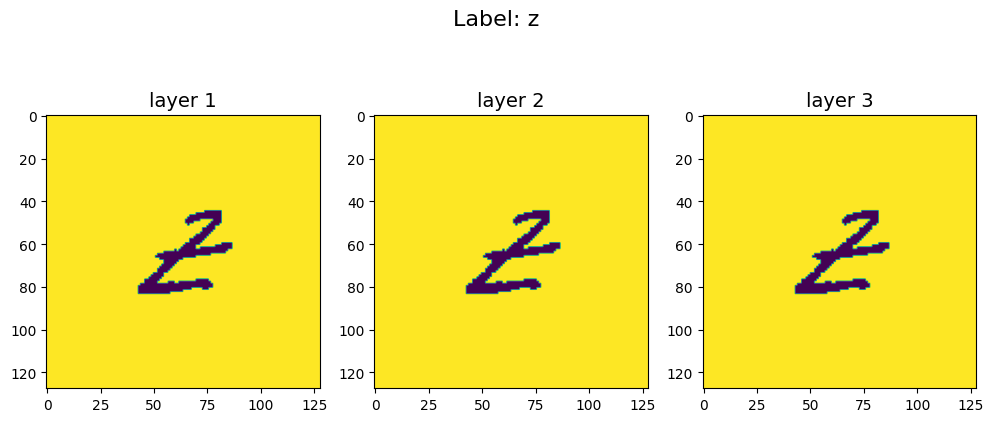

In [70]:
# choose an image from the other dataset

test_image_2 = cv2.imread(label_path_df['path'].iloc[-1])
layer_1, layer_2, layer_3 = cv2.split(test_image_2)

fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(12, 5))
plt.suptitle(f'Label: {label_path_df.label.iloc[-1]}', fontsize=16)
ax[0].imshow(layer_1)
ax[0].set_title('layer 1', fontsize=14)
ax[1].imshow(layer_2)
ax[1].set_title('layer 2', fontsize=14)
ax[2].imshow(layer_3)
ax[2].set_title('layer 3', fontsize=14)

In [68]:
# check if layers are the same:
print(layer_1.shape == layer_2.shape == layer_3.shape)
print(layer_1.sum() == layer_2.sum() == layer_3.sum())

True
True


shape after removing extra whitespace: (574, 573)


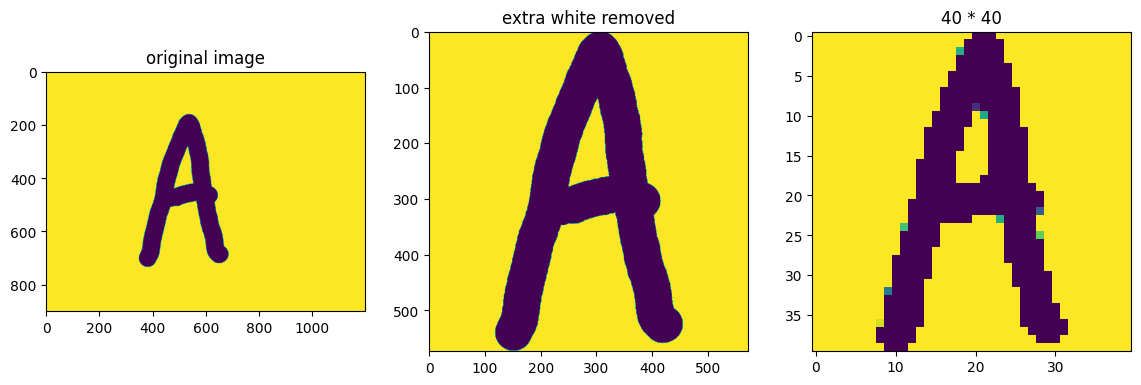

In [113]:
# remove extra whitespace

# check if it works on layer 1

layer = layer_1
new_rows = []
for row in layer:
    if row.mean() != 255:
        new_rows.append(row)
new_rows = np.array(new_rows)
new_columns = []
for column in new_rows.T:
    if column.mean() != 255:
        new_columns.append(column)
new_array = np.array(new_columns).T
# the image should be a square - add whitespace to make it into a square
width = new_array.shape[1]
height = new_array.shape[0]
if width > height:
    amount_rows_to_add = (width-height)//2
    row_to_add = [255.0 for n in range(width)]
    rows_to_add = np.array([row_to_add for n in range(amount_rows_to_add)])
    new_array = np.vstack([rows_to_add, new_array, rows_to_add])
if height > width:
    transpose = new_array.T
    amount_rows_to_add = (height-width)//2
    row_to_add = [255.0 for n in range(height)]
    rows_to_add = np.array([row_to_add for n in range(amount_rows_to_add)])
    new_array = np.vstack([rows_to_add, transpose, rows_to_add]).T
    
print('shape after removing extra whitespace:', new_array.shape)
new_array_small = cv2.resize(new_array, (40, 40))

fig, axs = plt.subplots(ncols=3, nrows=1, figsize=(14, 5))
axs[0].imshow(layer)
axs[0].set_title('original image')
axs[1].imshow(new_array)
axs[1].set_title('extra white removed')
axs[2].imshow(new_array_small)
axs[2].set_title('40 * 40');



shape after removing extra whitespace: (47, 47)


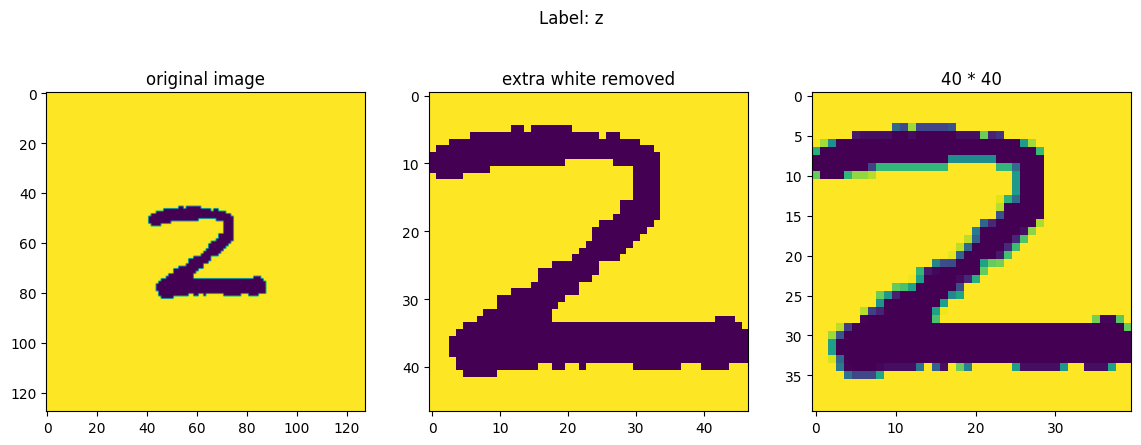

In [112]:
layer = cv2.split(cv2.imread(label_path_df.path.iloc[-2]))[0]
new_rows = []
for row in layer:
    if row.mean() != 255:
        new_rows.append(row)
new_rows = np.array(new_rows)
new_columns = []
for column in new_rows.T:
    if column.mean() != 255:
        new_columns.append(column)
new_array = np.array(new_columns).T
# the image should be a square - add whitespace to make it into a square
width = new_array.shape[1]
height = new_array.shape[0]
if width > height:
    amount_rows_to_add = (width-height)//2
    row_to_add = [255.0 for n in range(width)]
    rows_to_add = np.array([row_to_add for n in range(amount_rows_to_add)])
    new_array = np.vstack([rows_to_add, new_array, rows_to_add])
if height > width:
    transpose = new_array.T
    amount_rows_to_add = (height-width)//2
    row_to_add = [255.0 for n in range(height)]
    rows_to_add = np.array([row_to_add for n in range(amount_rows_to_add)])
    new_array = np.vstack([rows_to_add, transpose, rows_to_add]).T
    
print('shape after removing extra whitespace:', new_array.shape)
new_array_small = cv2.resize(new_array, (40, 40))

fig, axs = plt.subplots(ncols=3, nrows=1, figsize=(14, 5))
plt.suptitle(f'Label: {label_path_df.label.iloc[-2]}')
axs[0].imshow(layer)
axs[0].set_title('original image')
axs[1].imshow(new_array)
axs[1].set_title('extra white removed')
axs[2].imshow(new_array_small)
axs[2].set_title('40 * 40');

In [136]:
# create function to remove layers, remove whitespace, and resize images before adding them to the dataframe

def prepare_image(path):
    layer = cv2.split(cv2.imread(path))[0]
    new_rows = []
    for row in layer:
        if row.mean() != 255:
            new_rows.append(row)
    new_rows = np.array(new_rows)
    new_columns = []
    for column in new_rows.T:
        if column.mean() != 255:
            new_columns.append(column)
    new_array = np.array(new_columns).T
    # the image should be a square - add whitespace to make it into a square
    width = new_array.shape[1]
    height = new_array.shape[0]
    if width > height+3:
        # add 3 in order to account for images which are already close enough to being squares
        amount_rows_to_add = (width-height)//2
        row_to_add = [255.0 for n in range(width)]
        rows_to_add = np.array([row_to_add for n in range(amount_rows_to_add)])
        new_array = np.vstack([rows_to_add, new_array, rows_to_add])
    if height > width+3:
        transpose = new_array.T
        amount_rows_to_add = (height-width)//2
        row_to_add = [255.0 for n in range(height)]
        rows_to_add = np.array([row_to_add for n in range(amount_rows_to_add)])
        new_array = np.vstack([rows_to_add, transpose, rows_to_add]).T
    return cv2.resize(new_array, (40, 40))


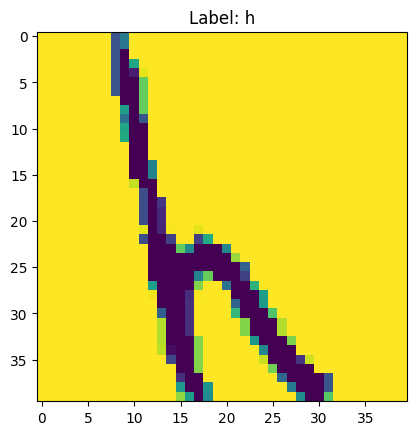

In [115]:
# check function

function_check = prepare_image(label_path_df.path.iloc[200500])
plt.title(f'Label: {label_path_df.label.iloc[200500]}')
plt.imshow(function_check);

In [116]:
# create dataframe for label and processed

images_df = label_path_df[['label']]

In [137]:
# import cleaned up images 

images_for_dataframe = []
for p in label_path_df.path:
    try:
        images_for_dataframe.append(prepare_image(p)) 
    except Exception as e:
        print(e)
        images_for_dataframe.append('error')

In [138]:
images_df['images'] = images_for_dataframe

In [139]:
print(images_df.shape)
images_df.sample()

(428532, 2)


,label,images
380926,U,"[[255.0, 255.0, 255.0, 255.0, 255.0, 255.0, 25..."


In [141]:
# save dataframe as csv

images_df.to_csv('data/processed_files/DataFrames/images_df_all_labels.csv', index=False)

In [144]:
# Some letters and numbers look the same - even a human can't tell the difference between, for example, O and 0, without context.
# Put the numbers and letters that look the same together into one label. 

In [146]:
label_i = images_df[images_df.label=='i']

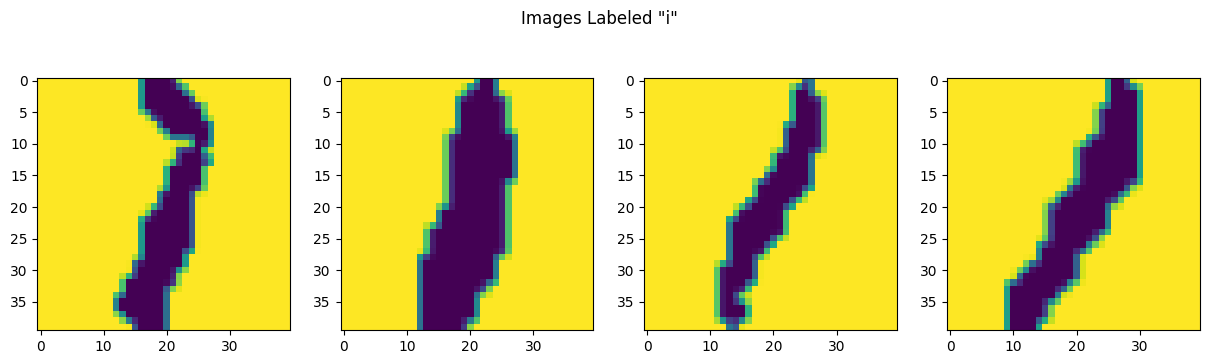

In [177]:
# check the i label to see if they look like I

import random

fig, ax = plt.subplots(nrows=1, ncols=4, figsize=(15, 4))
plt.suptitle('Images Labeled "i"')
ax[0].imshow(label_i.images.iloc[random.randint(0, len(label_i))])
ax[1].imshow(label_i.images.iloc[random.randint(0, len(label_i))])
ax[2].imshow(label_i.images.iloc[random.randint(0, len(label_i))])
ax[3].imshow(label_i.images.iloc[random.randint(0, len(label_i))])

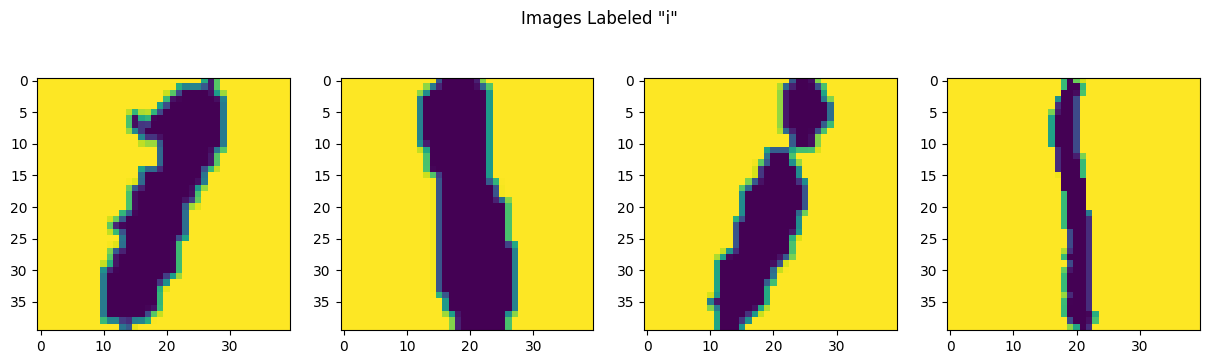

In [175]:
fig, ax = plt.subplots(nrows=1, ncols=4, figsize=(15, 4))
plt.suptitle('Images Labeled "i"')
ax[0].imshow(label_i.images.iloc[random.randint(0, len(label_i))])
ax[1].imshow(label_i.images.iloc[random.randint(0, len(label_i))])
ax[2].imshow(label_i.images.iloc[random.randint(0, len(label_i))])
ax[3].imshow(label_i.images.iloc[random.randint(0, len(label_i))])

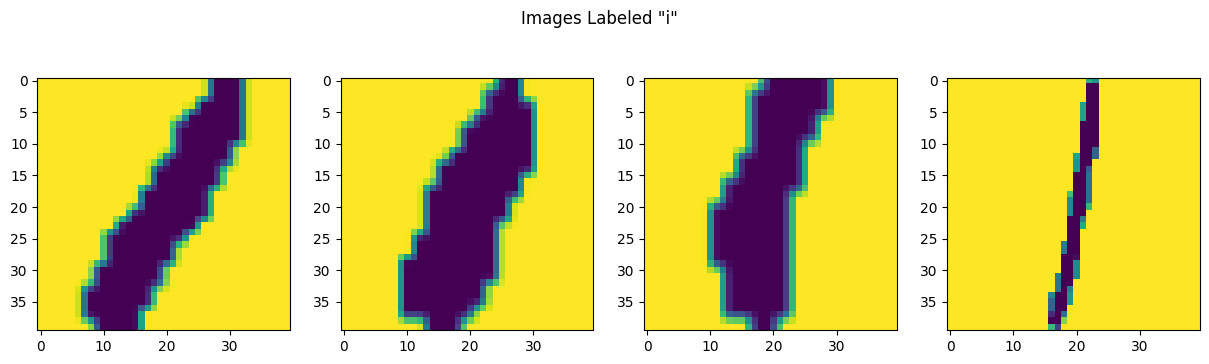

In [178]:
fig, ax = plt.subplots(nrows=1, ncols=4, figsize=(15, 4))
plt.suptitle('Images Labeled "i"')
ax[0].imshow(label_i.images.iloc[random.randint(0, len(label_i))])
ax[1].imshow(label_i.images.iloc[random.randint(0, len(label_i))])
ax[2].imshow(label_i.images.iloc[random.randint(0, len(label_i))])
ax[3].imshow(label_i.images.iloc[random.randint(0, len(label_i))])

In [179]:
label_I = images_df[images_df.label=='I']

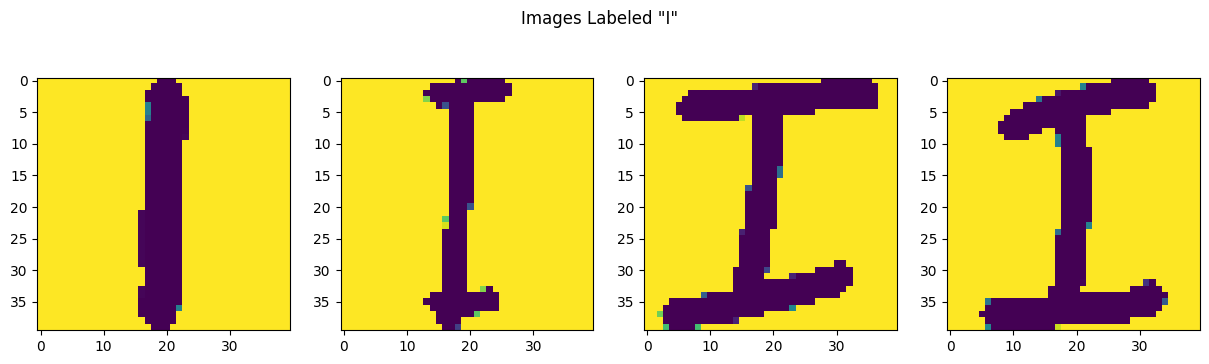

In [181]:
fig, ax = plt.subplots(nrows=1, ncols=4, figsize=(15, 4))
plt.suptitle('Images Labeled "I"')
ax[0].imshow(label_I.images.iloc[random.randint(0, len(label_I))])
ax[1].imshow(label_I.images.iloc[random.randint(0, len(label_I))])
ax[2].imshow(label_I.images.iloc[random.randint(0, len(label_I))])
ax[3].imshow(label_I.images.iloc[random.randint(0, len(label_I))])

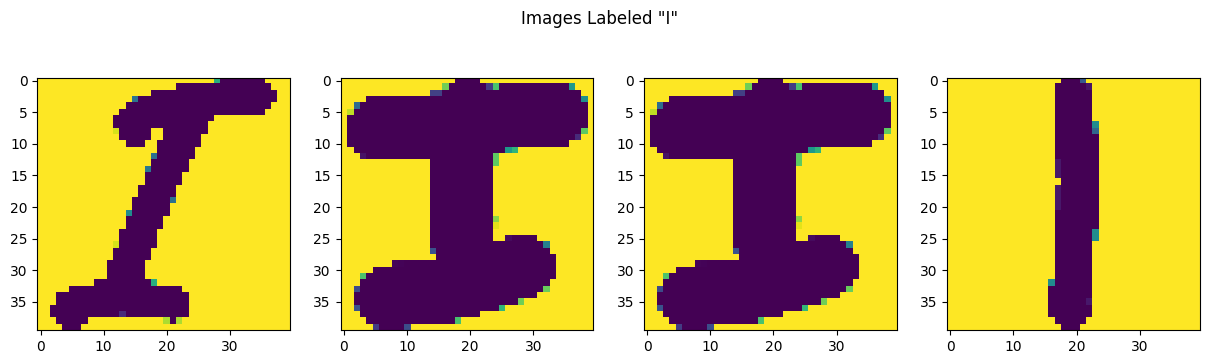

In [182]:
fig, ax = plt.subplots(nrows=1, ncols=4, figsize=(15, 4))
plt.suptitle('Images Labeled "I"')
ax[0].imshow(label_I.images.iloc[random.randint(0, len(label_I))])
ax[1].imshow(label_I.images.iloc[random.randint(0, len(label_I))])
ax[2].imshow(label_I.images.iloc[random.randint(0, len(label_I))])
ax[3].imshow(label_I.images.iloc[random.randint(0, len(label_I))])

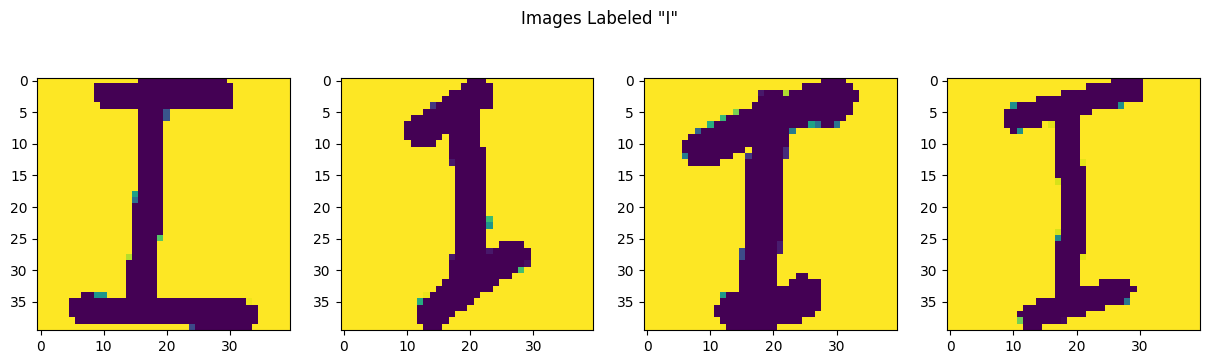

In [183]:
fig, ax = plt.subplots(nrows=1, ncols=4, figsize=(15, 4))
plt.suptitle('Images Labeled "I"')
ax[0].imshow(label_I.images.iloc[random.randint(0, len(label_I))])
ax[1].imshow(label_I.images.iloc[random.randint(0, len(label_I))])
ax[2].imshow(label_I.images.iloc[random.randint(0, len(label_I))])
ax[3].imshow(label_I.images.iloc[random.randint(0, len(label_I))])

In [184]:
label_l = images_df[images_df.label=='l']

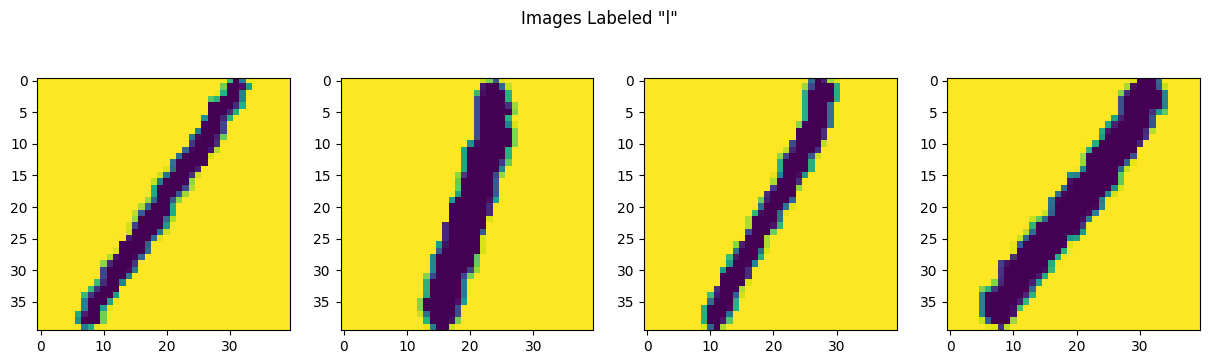

In [189]:
fig, ax = plt.subplots(nrows=1, ncols=4, figsize=(15, 4))
plt.suptitle('Images Labeled "l"')
ax[0].imshow(label_l.images.iloc[random.randint(0, len(label_l))])
ax[1].imshow(label_l.images.iloc[random.randint(0, len(label_l))])
ax[2].imshow(label_l.images.iloc[random.randint(0, len(label_l))])
ax[3].imshow(label_l.images.iloc[random.randint(0, len(label_l))])

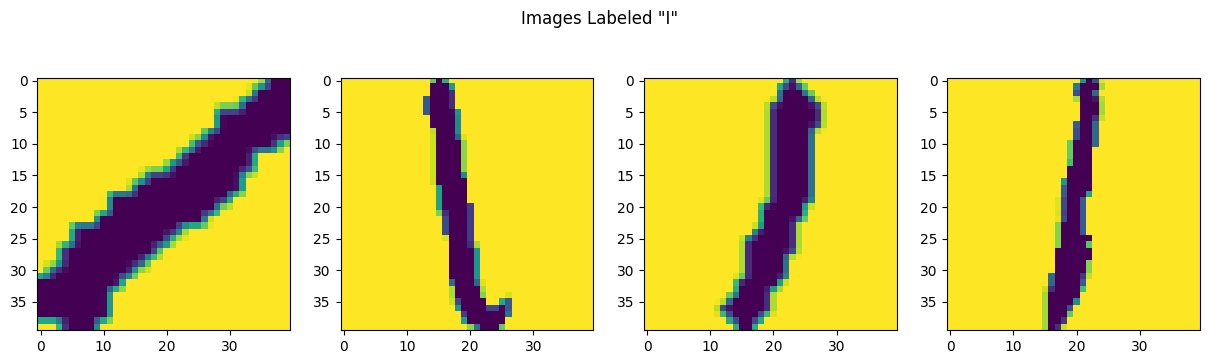

In [186]:
fig, ax = plt.subplots(nrows=1, ncols=4, figsize=(15, 4))
plt.suptitle('Images Labeled "l"')
ax[0].imshow(label_l.images.iloc[random.randint(0, len(label_l))])
ax[1].imshow(label_l.images.iloc[random.randint(0, len(label_l))])
ax[2].imshow(label_l.images.iloc[random.randint(0, len(label_l))])
ax[3].imshow(label_l.images.iloc[random.randint(0, len(label_l))])

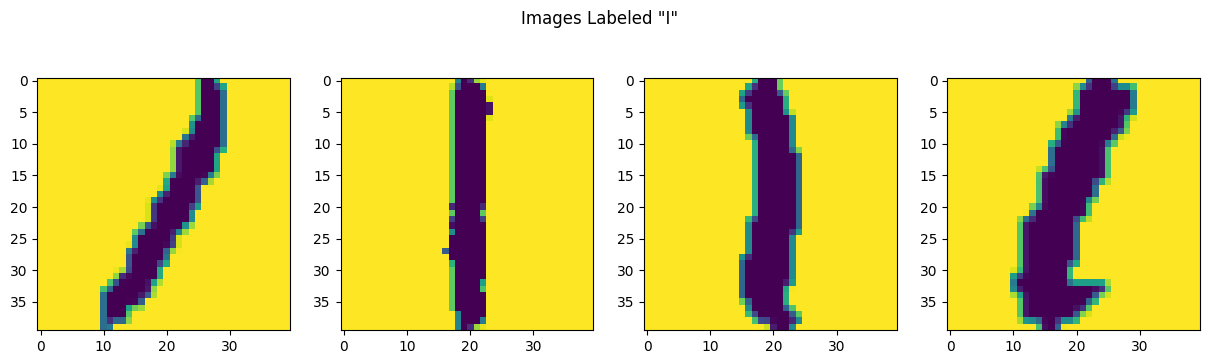

In [187]:
fig, ax = plt.subplots(nrows=1, ncols=4, figsize=(15, 4))
plt.suptitle('Images Labeled "l"')
ax[0].imshow(label_l.images.iloc[random.randint(0, len(label_l))])
ax[1].imshow(label_l.images.iloc[random.randint(0, len(label_l))])
ax[2].imshow(label_l.images.iloc[random.randint(0, len(label_l))])
ax[3].imshow(label_l.images.iloc[random.randint(0, len(label_l))])

In [188]:
label_1 = images_df[images_df.label=='1']

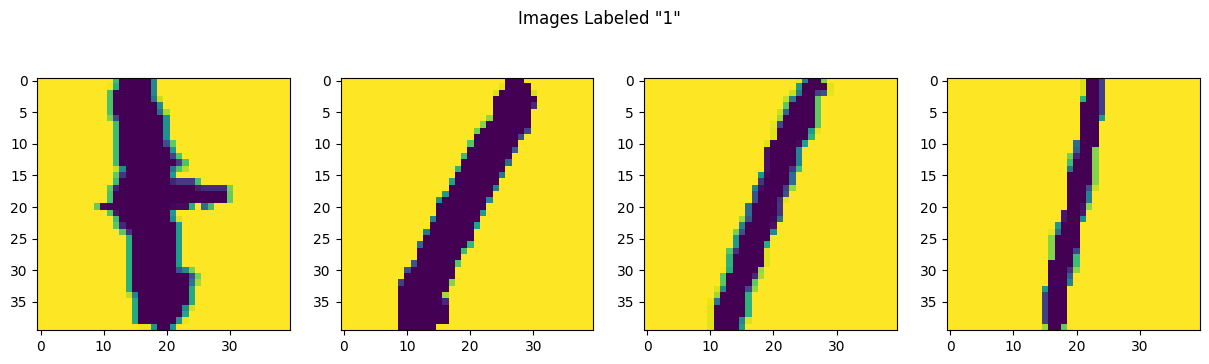

In [191]:
fig, ax = plt.subplots(nrows=1, ncols=4, figsize=(15, 4))
plt.suptitle('Images Labeled "1"')
ax[0].imshow(label_1.images.iloc[random.randint(0, len(label_1))])
ax[1].imshow(label_1.images.iloc[random.randint(0, len(label_1))])
ax[2].imshow(label_1.images.iloc[random.randint(0, len(label_1))])
ax[3].imshow(label_1.images.iloc[random.randint(0, len(label_1))])

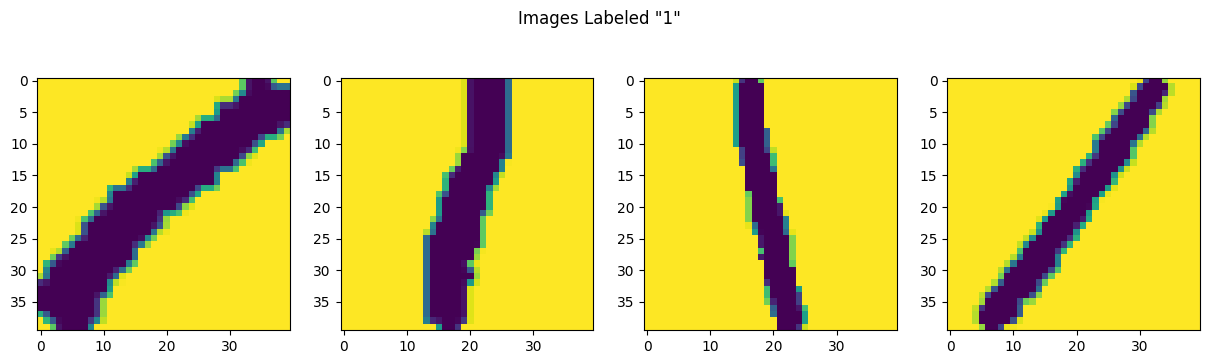

In [192]:
fig, ax = plt.subplots(nrows=1, ncols=4, figsize=(15, 4))
plt.suptitle('Images Labeled "1"')
ax[0].imshow(label_1.images.iloc[random.randint(0, len(label_1))])
ax[1].imshow(label_1.images.iloc[random.randint(0, len(label_1))])
ax[2].imshow(label_1.images.iloc[random.randint(0, len(label_1))])
ax[3].imshow(label_1.images.iloc[random.randint(0, len(label_1))])

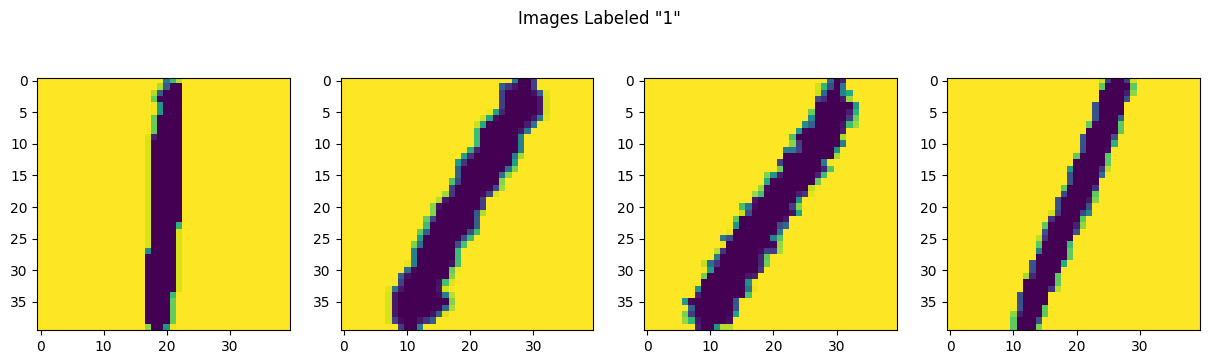

In [193]:
fig, ax = plt.subplots(nrows=1, ncols=4, figsize=(15, 4))
plt.suptitle('Images Labeled "1"')
ax[0].imshow(label_1.images.iloc[random.randint(0, len(label_1))])
ax[1].imshow(label_1.images.iloc[random.randint(0, len(label_1))])
ax[2].imshow(label_1.images.iloc[random.randint(0, len(label_1))])
ax[3].imshow(label_1.images.iloc[random.randint(0, len(label_1))])

In [195]:
label_j = images_df[images_df.label=='j']
label_J = images_df[images_df.label=='J']

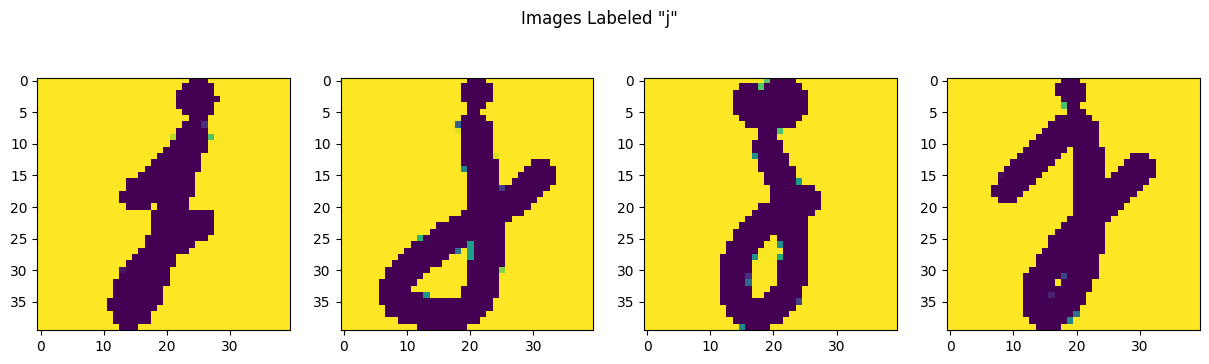

In [196]:
fig, ax = plt.subplots(nrows=1, ncols=4, figsize=(15, 4))
plt.suptitle('Images Labeled "j"')
ax[0].imshow(label_j.images.iloc[random.randint(0, len(label_j))])
ax[1].imshow(label_j.images.iloc[random.randint(0, len(label_j))])
ax[2].imshow(label_j.images.iloc[random.randint(0, len(label_j))])
ax[3].imshow(label_j.images.iloc[random.randint(0, len(label_j))])

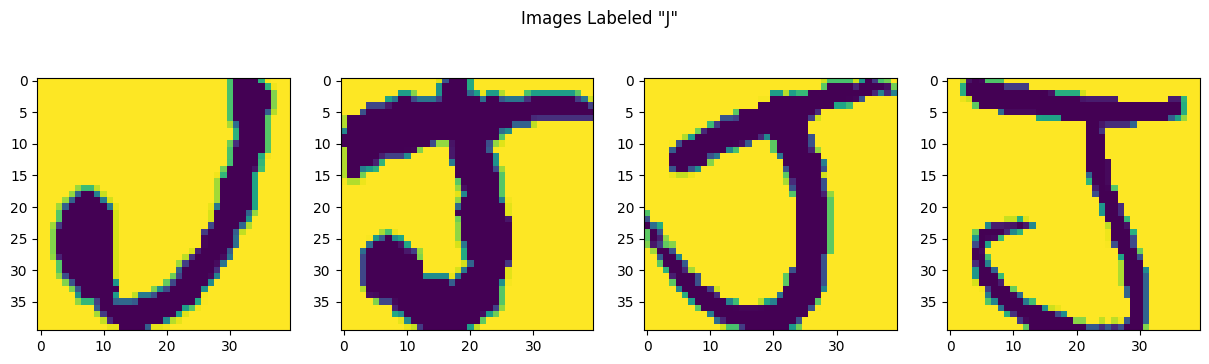

In [197]:
fig, ax = plt.subplots(nrows=1, ncols=4, figsize=(15, 4))
plt.suptitle('Images Labeled "J"')
ax[0].imshow(label_J.images.iloc[random.randint(0, len(label_J))])
ax[1].imshow(label_J.images.iloc[random.randint(0, len(label_J))])
ax[2].imshow(label_J.images.iloc[random.randint(0, len(label_J))])
ax[3].imshow(label_J.images.iloc[random.randint(0, len(label_J))])

In [199]:
label_k = images_df[images_df.label=='k']
label_K = images_df[images_df.label=='K']

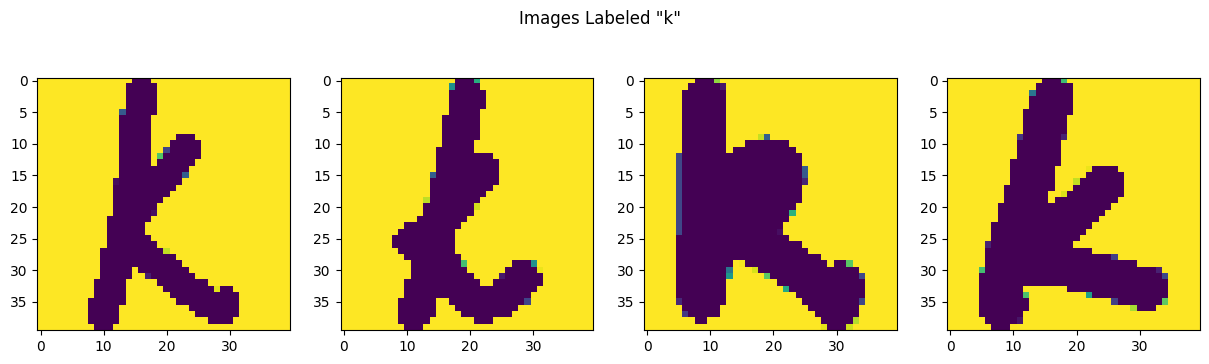

In [200]:
fig, ax = plt.subplots(nrows=1, ncols=4, figsize=(15, 4))
plt.suptitle('Images Labeled "k"')
ax[0].imshow(label_k.images.iloc[random.randint(0, len(label_k))])
ax[1].imshow(label_k.images.iloc[random.randint(0, len(label_k))])
ax[2].imshow(label_k.images.iloc[random.randint(0, len(label_k))])
ax[3].imshow(label_k.images.iloc[random.randint(0, len(label_k))])

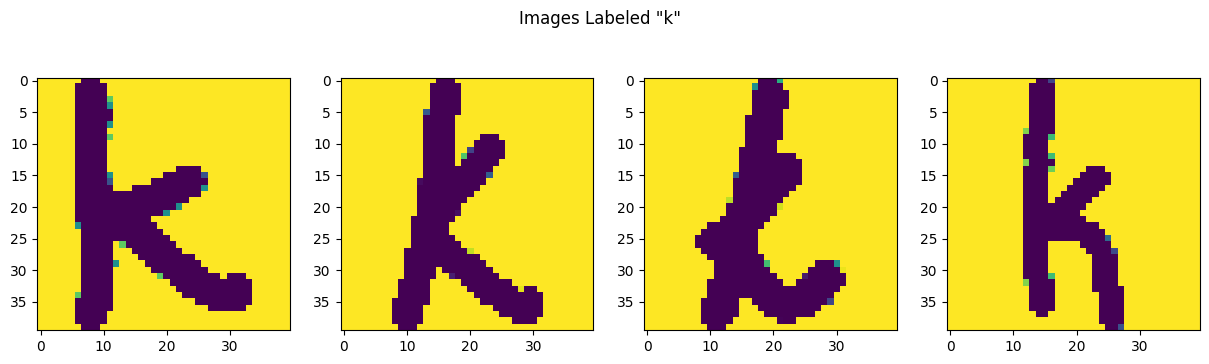

In [201]:
fig, ax = plt.subplots(nrows=1, ncols=4, figsize=(15, 4))
plt.suptitle('Images Labeled "k"')
ax[0].imshow(label_k.images.iloc[random.randint(0, len(label_k))])
ax[1].imshow(label_k.images.iloc[random.randint(0, len(label_k))])
ax[2].imshow(label_k.images.iloc[random.randint(0, len(label_k))])
ax[3].imshow(label_k.images.iloc[random.randint(0, len(label_k))])

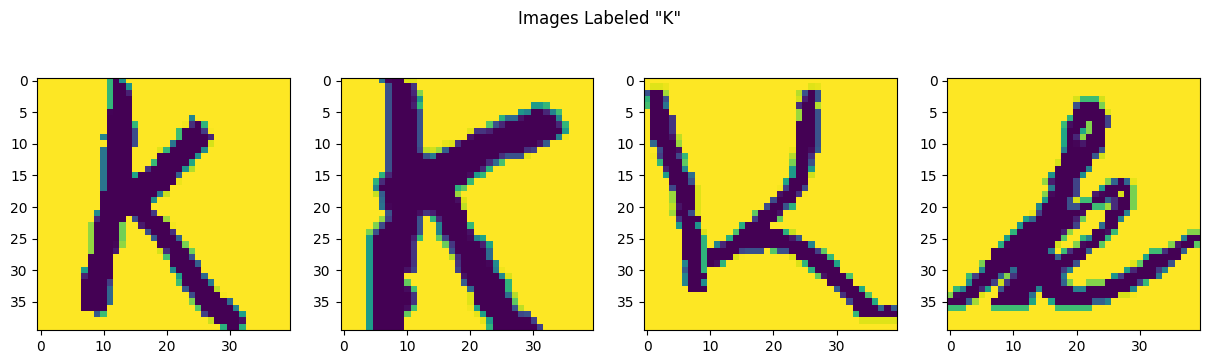

In [202]:
fig, ax = plt.subplots(nrows=1, ncols=4, figsize=(15, 4))
plt.suptitle('Images Labeled "K"')
ax[0].imshow(label_K.images.iloc[random.randint(0, len(label_K))])
ax[1].imshow(label_K.images.iloc[random.randint(0, len(label_K))])
ax[2].imshow(label_K.images.iloc[random.randint(0, len(label_K))])
ax[3].imshow(label_K.images.iloc[random.randint(0, len(label_K))])

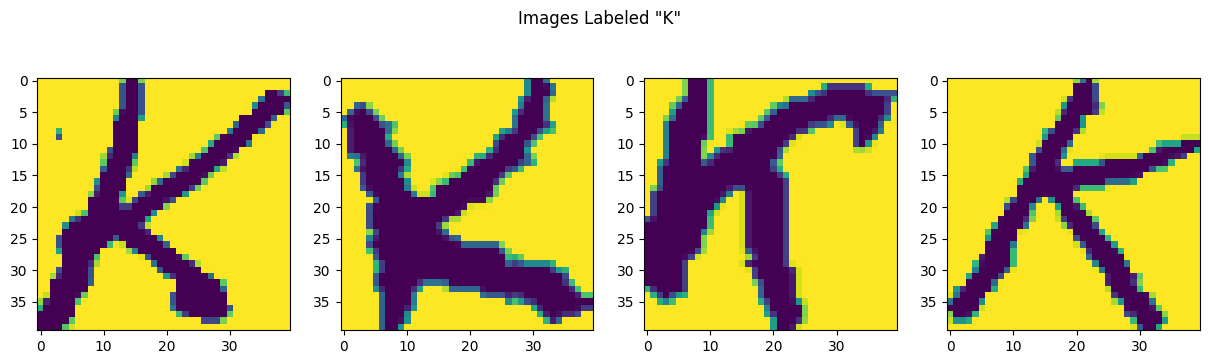

In [203]:
fig, ax = plt.subplots(nrows=1, ncols=4, figsize=(15, 4))
plt.suptitle('Images Labeled "K"')
ax[0].imshow(label_K.images.iloc[random.randint(0, len(label_K))])
ax[1].imshow(label_K.images.iloc[random.randint(0, len(label_K))])
ax[2].imshow(label_K.images.iloc[random.randint(0, len(label_K))])
ax[3].imshow(label_K.images.iloc[random.randint(0, len(label_K))])

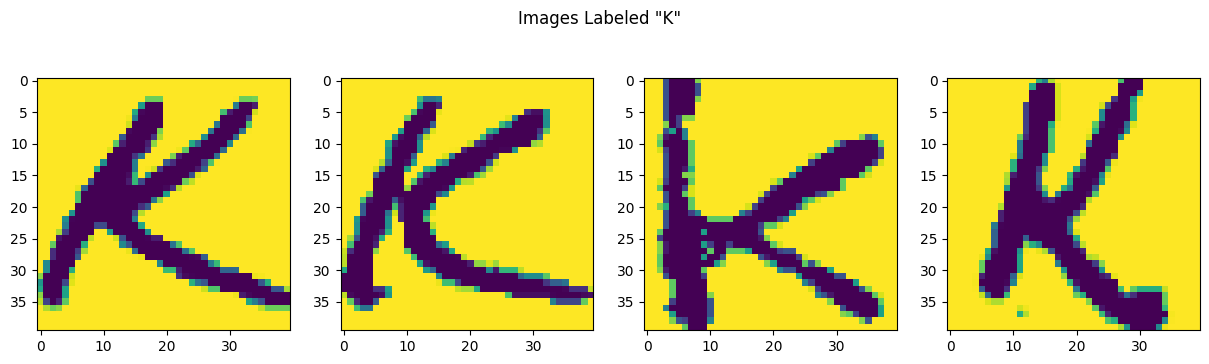

In [204]:
fig, ax = plt.subplots(nrows=1, ncols=4, figsize=(15, 4))
plt.suptitle('Images Labeled "K"')
ax[0].imshow(label_K.images.iloc[random.randint(0, len(label_K))])
ax[1].imshow(label_K.images.iloc[random.randint(0, len(label_K))])
ax[2].imshow(label_K.images.iloc[random.randint(0, len(label_K))])
ax[3].imshow(label_K.images.iloc[random.randint(0, len(label_K))])

In [206]:
label_y = images_df[images_df.label=='y']
label_Y = images_df[images_df.label=='Y']

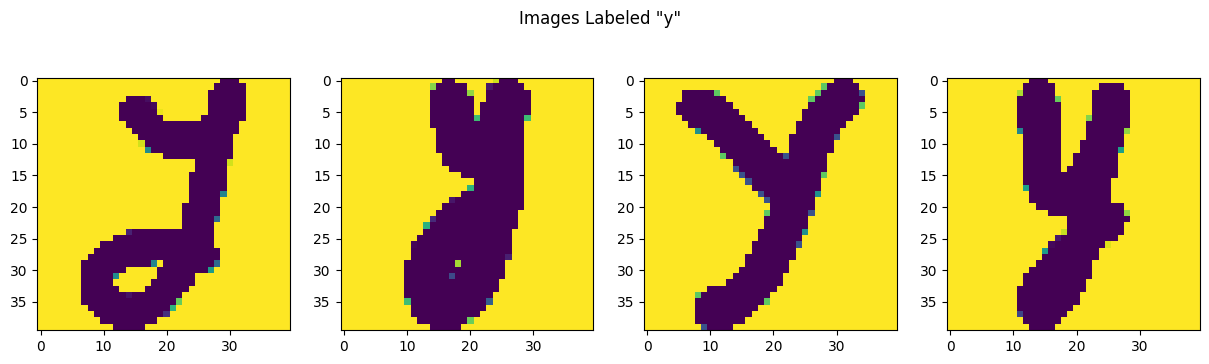

In [211]:
fig, ax = plt.subplots(nrows=1, ncols=4, figsize=(15, 4))
plt.suptitle('Images Labeled "y"')
ax[0].imshow(label_y.images.iloc[random.randint(0, len(label_y))])
ax[1].imshow(label_y.images.iloc[random.randint(0, len(label_y))])
ax[2].imshow(label_y.images.iloc[random.randint(0, len(label_y))])
ax[3].imshow(label_y.images.iloc[random.randint(0, len(label_y))])

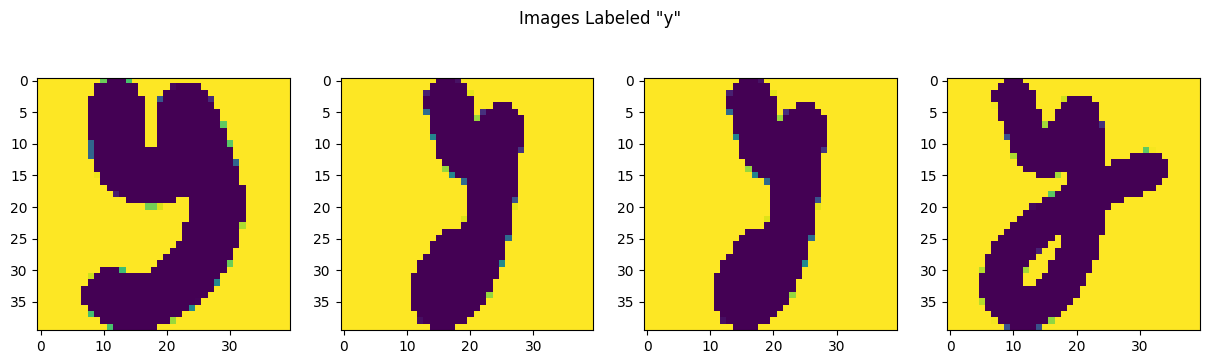

In [213]:
fig, ax = plt.subplots(nrows=1, ncols=4, figsize=(15, 4))
plt.suptitle('Images Labeled "y"')
ax[0].imshow(label_y.images.iloc[random.randint(0, len(label_y))])
ax[1].imshow(label_y.images.iloc[random.randint(0, len(label_y))])
ax[2].imshow(label_y.images.iloc[random.randint(0, len(label_y))])
ax[3].imshow(label_y.images.iloc[random.randint(0, len(label_y))])

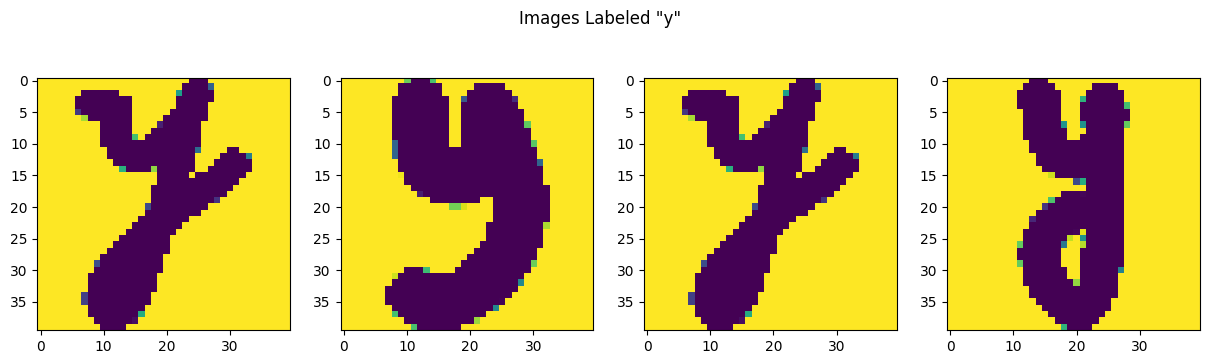

In [214]:
fig, ax = plt.subplots(nrows=1, ncols=4, figsize=(15, 4))
plt.suptitle('Images Labeled "y"')
ax[0].imshow(label_y.images.iloc[random.randint(0, len(label_y))])
ax[1].imshow(label_y.images.iloc[random.randint(0, len(label_y))])
ax[2].imshow(label_y.images.iloc[random.randint(0, len(label_y))])
ax[3].imshow(label_y.images.iloc[random.randint(0, len(label_y))])

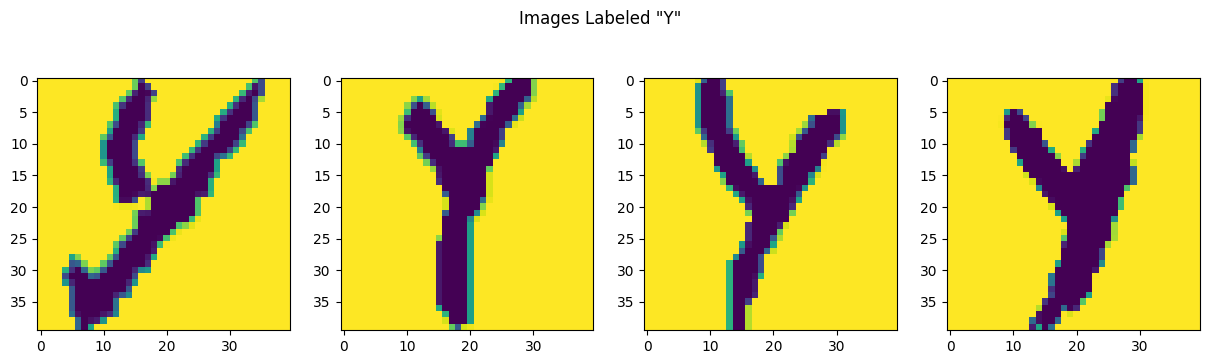

In [212]:
fig, ax = plt.subplots(nrows=1, ncols=4, figsize=(15, 4))
plt.suptitle('Images Labeled "Y"')
ax[0].imshow(label_Y.images.iloc[random.randint(0, len(label_Y))])
ax[1].imshow(label_Y.images.iloc[random.randint(0, len(label_Y))])
ax[2].imshow(label_Y.images.iloc[random.randint(0, len(label_Y))])
ax[3].imshow(label_Y.images.iloc[random.randint(0, len(label_Y))])

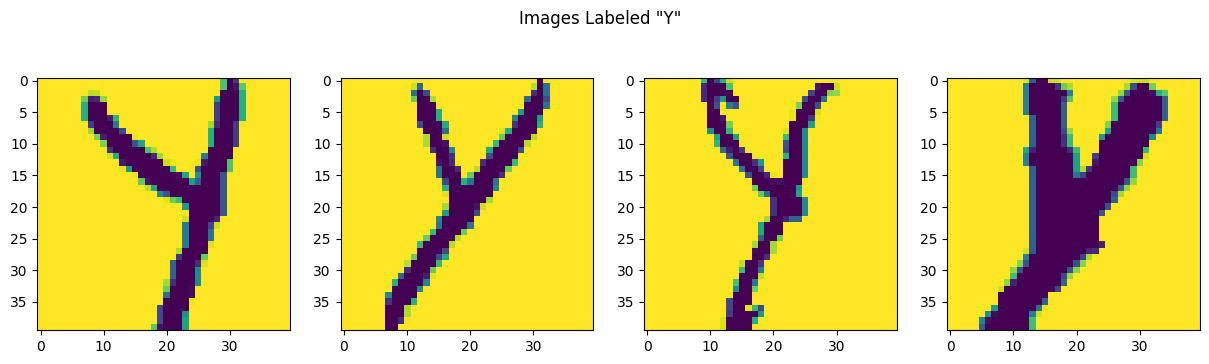

In [210]:
fig, ax = plt.subplots(nrows=1, ncols=4, figsize=(15, 4))
plt.suptitle('Images Labeled "Y"')
ax[0].imshow(label_Y.images.iloc[random.randint(0, len(label_Y))])
ax[1].imshow(label_Y.images.iloc[random.randint(0, len(label_Y))])
ax[2].imshow(label_Y.images.iloc[random.randint(0, len(label_Y))])
ax[3].imshow(label_Y.images.iloc[random.randint(0, len(label_Y))])

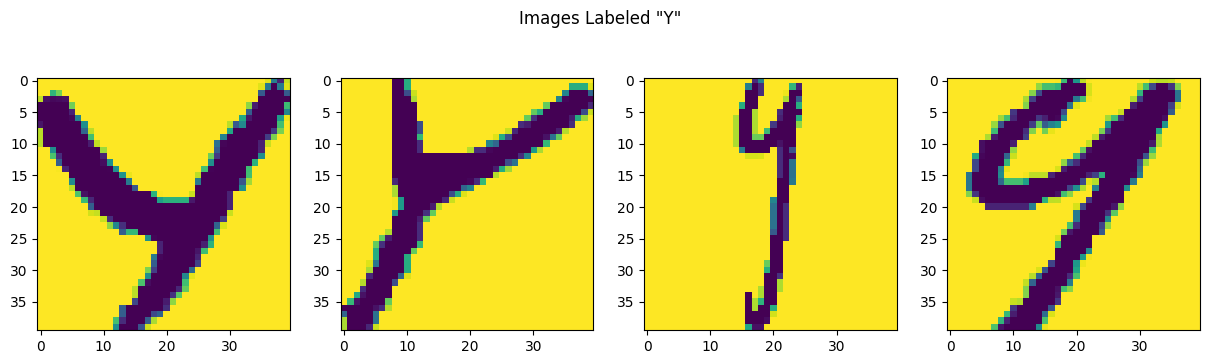

In [209]:
fig, ax = plt.subplots(nrows=1, ncols=4, figsize=(15, 4))
plt.suptitle('Images Labeled "Y"')
ax[0].imshow(label_Y.images.iloc[random.randint(0, len(label_Y))])
ax[1].imshow(label_Y.images.iloc[random.randint(0, len(label_Y))])
ax[2].imshow(label_Y.images.iloc[random.randint(0, len(label_Y))])
ax[3].imshow(label_Y.images.iloc[random.randint(0, len(label_Y))])

In [ ]:
# the k and K look very similar but not exactly the same. Leave them separate for now.
# j and J look different.
# i, l, and 1 look the same; I looks different.
# y and Y look similar but not exactly the same, leave them separate for now.

In [215]:
label_dictionary_1 = {'c': 'c/C',
                    'C': 'c/C',
                    'i': 'i/l/1',
                    'l': 'i/l/1',
                    '1': 'i/l/1',
                    #'j': 'j/J',
                    #'J': 'j/J',
                    #'k':'k/K',
                    #'K': 'k/K',
                    '0': 'o/O/0',
                    'o': 'o/O/0',
                    'O': 'o/O/0',
                    'p': 'p/P',
                    'P': 'p/P',
                    's': 's/S',
                    'S': 's/S',
                    'u': 'u/U',
                    'U': 'u/U',
                    'v': 'v/V',
                    'V': 'v/V',
                    'w': 'w/W',
                    'W': 'w/W',
                    'x': 'x/X',
                    'X': 'x/X',
                    #'y': 'y/Y',
                    #'Y': 'y/Y',
                    'z': 'z/Z',
                    'Z': 'z/Z'
                    }
label_dictionary_2 = {'c': 'c/C',
                    'C': 'c/C',
                    'i': 'i/l/1',
                    'l': 'i/l/1',
                    '1': 'i/l/1',
                    'j': 'j/J',
                    'J': 'j/J',
                    'k':'k/K',
                    'K': 'k/K',
                    '0': 'o/O/0',
                    'o': 'o/O/0',
                    'O': 'o/O/0',
                    'p': 'p/P',
                    'P': 'p/P',
                    's': 's/S',
                    'S': 's/S',
                    'u': 'u/U',
                    'U': 'u/U',
                    'v': 'v/V',
                    'V': 'v/V',
                    'w': 'w/W',
                    'W': 'w/W',
                    'x': 'x/X',
                    'X': 'x/X',
                    'y': 'y/Y',
                    'Y': 'y/Y',
                    'z': 'z/Z',
                    'Z': 'z/Z'
                    }

In [220]:
labels_update_1 = [label_dictionary_1[val] if val in label_dictionary_1.keys() else val for val in images_df.label]
labels_update_2 = [label_dictionary_2[val] if val in label_dictionary_2.keys() else val for val in images_df.label]

In [221]:
images_df['labels_update_1'] = labels_update_1
images_df['labels_update_2'] = labels_update_2

In [222]:
# prepare data for the model

# separate in X and labels

X = images_df.drop(columns=['label', 'labels_update_1', 'labels_update_2'])
y_original_1 = images_df['labels_update_1']
y_original_2 = images_df['labels_update_2']

In [223]:
# check percentage of each label
y_original_1.value_counts(10)*100

i/l/1    7.689741
o/O/0    6.327415
u/U      3.021245
c/C      3.010744
s/S      2.988808
m        2.961039
f        2.928136
p/P      2.750786
R        2.653944
T        2.346383
N        2.346383
e        2.346383
a        2.346383
d        2.346383
7        2.346383
8        2.346383
2        2.346383
3        2.346383
4        2.346383
5        2.346383
6        2.346383
9        2.346383
t        2.346383
r        2.346383
h        2.279410
n        2.147798
g        1.906509
v/V      1.847003
w/W      1.828335
Y        1.750628
A        1.648652
H        1.633250
q        1.556243
J        1.385427
x/X      1.321022
Q        1.315888
b        1.308187
G        1.305387
z/Z      1.291385
E        1.277618
L        1.270617
K        1.187776
D        1.166774
B        0.967489
M        0.012835
I        0.012835
j        0.012835
k        0.012835
F        0.012835
y        0.012835
Name: labels_update_1, dtype: float64

In [224]:
images_df['label_factorized_1'], label_index_1 = pd.factorize(y_original_1)
images_df['label_factorized_2'], label_index_2 = pd.factorize(y_original_2)

In [225]:
# factorize the labels for the dataframe
y = pd.factorize(y_original_1)[0]

In [250]:
img_size = 40

x_train, x_test, y_train, y_test = train_test_split(X.values, y, test_size = 0.25, stratify=y, random_state=22)

print("Shape of training data:", x_train.shape)
print("Shape of testing data:", x_test.shape)

Shape of training data: (321399, 1)
Shape of testing data: (107133, 1)


In [247]:
print(x_train[909].shape)
print(x_train[909][0].shape)

# the shape should be (40, 40) - not (1,) - change x_train and x_test to have this shape

(1,)
(40, 40)


In [259]:
x_train, x_test, y_train, y_test = train_test_split([val[0] for val in X.values], y, test_size = 0.25, stratify=y, random_state=22)

x_train = np.array(x_train)

x_test = np.array(x_test)

print("Shape of training data:", x_train.shape)
print("Shape of testing data:", x_test.shape)


Shape of training data: (321399, 40, 40)
Shape of testing data: (107133, 40, 40)


In [260]:
print(label_index_1)

Index(['o/O/0', 'i/l/1', '2', '3', '4', '5', '6', '7', '8', '9', 'A', 'B',
       'c/C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 'L', 'M', 'N', 'p/P',
       'Q', 'R', 's/S', 'T', 'u/U', 'v/V', 'w/W', 'x/X', 'Y', 'z/Z', 'a', 'b',
       'd', 'e', 'f', 'g', 'h', 'j', 'k', 'm', 'n', 'q', 'r', 't', 'y'],
      dtype='object')


h


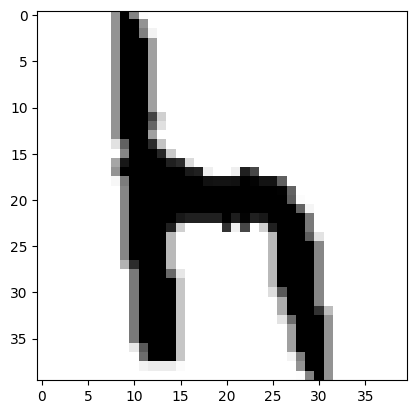

In [261]:
# check if label index is correct
print(label_index_1[y_train[30000]])
plt.gray()
plt.imshow(x_train[30000]);

In [262]:
x_train = x_train.reshape(x_train.shape[0],x_train.shape[1],x_train.shape[2],1)
x_test = x_test.reshape(x_test.shape[0], x_test.shape[1], x_test.shape[2],1)
print("New shape of training data: ", x_train.shape)
print("New shape of testing data: ", x_test.shape)

New shape of training data:  (321399, 40, 40, 1)
New shape of testing data:  (107133, 40, 40, 1)


In [37]:
import tensorflow
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPool2D, Dropout
from tensorflow.keras.optimizers import SGD, Adam
from tensorflow.keras.callbacks import ReduceLROnPlateau, EarlyStopping
from tensorflow.keras.layers import BatchNormalization

In [264]:
print(len(set(label_index_1)))

50


In [265]:
# change format of labels for the model
y_training = to_categorical(y_train, num_classes = 50, dtype='int')
y_testing = to_categorical(y_test, num_classes = 50, dtype='int')

In [266]:
x_train_norm = x_train/255
x_test_norm = x_test/255

In [267]:
# make validation dataset

x_train_norm_train, x_validate, y_training_train, y_validate = train_test_split(x_train_norm, 
                    y_training, test_size = 0.20, stratify=y_training, random_state=22)

In [269]:
def make_model(input_img_size = 40, output_amount_labels=50):
    model = Sequential()
    model.add(Conv2D(64 , (3, 3), activation='relu', input_shape=(input_img_size, input_img_size, 1)))
    model.add(MaxPool2D(2, 2))
 
    model.add(Conv2D(64, (3, 3), activation='relu'))
    model.add(MaxPool2D(2, 2))
 
    model.add(Conv2D(64, (3, 3), activation='relu'))
    model.add(MaxPool2D(2,2))
    
    model.add(Flatten())
 
    model.add(Dense(128,activation ="relu"))
    model.add(Dense(256,activation ="relu"))
    model.add(Dense(output_amount_labels,activation ="softmax"))
    
    print(model.summary())
    
    return model

model = make_model()
model.compile(optimizer = Adam(learning_rate=0.001), loss='categorical_crossentropy', metrics=['accuracy'])
history = model.fit(x_train_norm_train, y_training_train, epochs=5,  validation_data = (x_validate,y_validate))

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 38, 38, 64)        640       
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 19, 19, 64)       0         
 2D)                                                             
                                                                 
 conv2d_4 (Conv2D)           (None, 17, 17, 64)        36928     
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 8, 8, 64)         0         
 2D)                                                             
                                                                 
 conv2d_5 (Conv2D)           (None, 6, 6, 64)          36928     
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 3, 3, 64)        

In [270]:
model.evaluate(x_test_norm, y_testing)

3348/3348 [==============================] - 51s 15ms/step - loss: 0.2129 - accuracy: 0.9392


[0.21290259063243866, 0.9391503930091858]

In [272]:
def define_model2(input_img_size=40, output_size=50):
    model = Sequential()
    model.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', input_shape=(input_img_size, input_img_size, 1)))
    model.add(BatchNormalization())
    model.add(MaxPool2D((2, 2)))
    model.add(Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform'))
    model.add(Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform'))
    model.add(MaxPool2D((2, 2)))
    model.add(Flatten())
    model.add(Dense(100, activation='relu', kernel_initializer='he_uniform'))
    model.add(BatchNormalization())
    model.add(Dense(output_size, activation='softmax'))
    return model


model2 = define_model2()
opt = SGD(learning_rate=0.01, momentum=0.9)
model2.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])
history = model2.fit(x_train_norm_train, y_training_train, epochs=5,  validation_data = (x_validate,y_validate))

Epoch 1/5
8035/8035 [==============================] - 907s 113ms/step - loss: 0.3847 - accuracy: 0.8934 - val_loss: 0.2720 - val_accuracy: 0.9227
Epoch 2/5
8035/8035 [==============================] - 1061s 132ms/step - loss: 0.2415 - accuracy: 0.9294 - val_loss: 0.2288 - val_accuracy: 0.9351
Epoch 3/5
8035/8035 [==============================] - 443s 55ms/step - loss: 0.2059 - accuracy: 0.9391 - val_loss: 0.2163 - val_accuracy: 0.9383
Epoch 4/5
8035/8035 [==============================] - 477s 59ms/step - loss: 0.1828 - accuracy: 0.9448 - val_loss: 0.2295 - val_accuracy: 0.9349
Epoch 5/5
8035/8035 [==============================] - 488s 61ms/step - loss: 0.1649 - accuracy: 0.9490 - val_loss: 0.2028 - val_accuracy: 0.9428


In [273]:
model2.evaluate(x_test_norm, y_testing)

3348/3348 [==============================] - 54s 16ms/step - loss: 0.2020 - accuracy: 0.9434


[0.20203207433223724, 0.9434254765510559]

In [274]:
valid_preds = model2.predict(x_validate)
test_preds = model2.predict(x_test_norm)
train_preds = model2.predict(x_train_norm)

10044/10044 [==============================] - 241s 24ms/step


In [276]:
history_model2_df = pd.DataFrame(history.history)
history_model2_df

,loss,accuracy,val_loss,val_accuracy
0,0.384729,0.893368,0.272020,0.922713
1,0.241473,0.929360,0.228780,0.935112
2,0.205943,0.939063,0.216306,0.938301
3,0.182807,0.944773,0.229502,0.934894
4,0.164913,0.948958,0.202838,0.942782


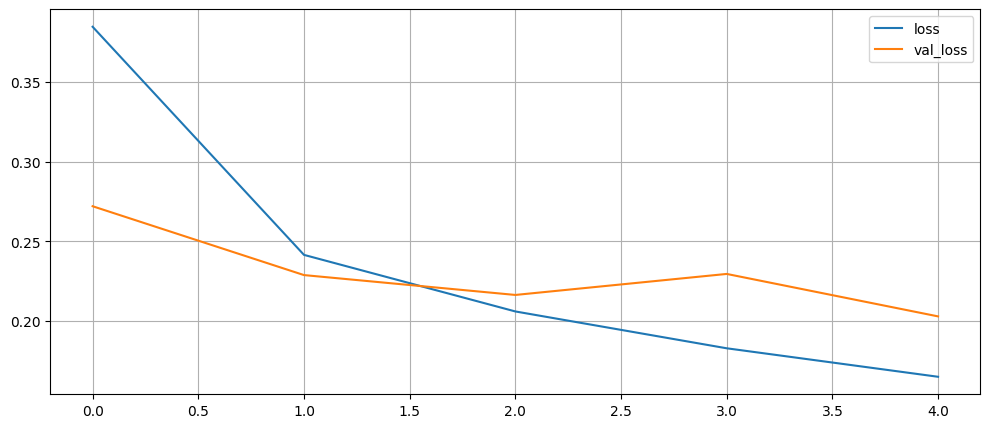

In [277]:
pd.DataFrame(history.history)[['loss', 'val_loss']].plot(figsize=(12, 5))
plt.grid(True)
plt.gca() # set the vertical range to [0-1]
plt.show()

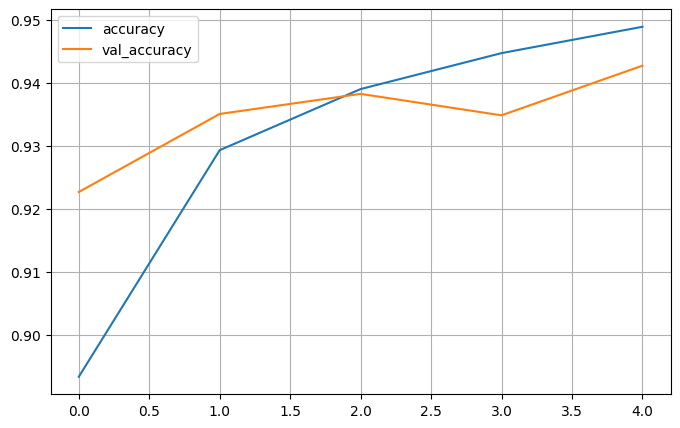

In [278]:
pd.DataFrame(history.history)[['accuracy', 'val_accuracy']].plot(figsize=(8, 5))
plt.grid(True)
plt.gca() # set the vertical range to [0-1]
plt.show()

In [282]:
y_validate_labels = [label_index_1[y_validate[i].argmax()] for i in range(len(y_validate))]
y_test_labels = [label_index_1[y_testing[i].argmax()] for i in range(len(y_testing))]
y_train_labels =  [label_index_1[y_training[i].argmax()] for i in range(len(y_training))]

pred_y_validate_labels = [label_index_1[valid_preds[i].argmax()] for i in range(len(valid_preds))]
pred_y_test_labels = [label_index_1[test_preds[i].argmax()] for i in range(len(test_preds))]
pred_y_train_labels = [label_index_1[train_preds[i].argmax()] for i in range(len(train_preds))]

validate_error_counter = dict(zip(list(set(y_validate_labels)),[0 for i in range(50)]))
test_error_counter = dict(zip(list(set(y_validate_labels)),[0 for i in range(50)]))
train_error_counter = dict(zip(list(set(y_validate_labels)),[0 for i in range(50)]))

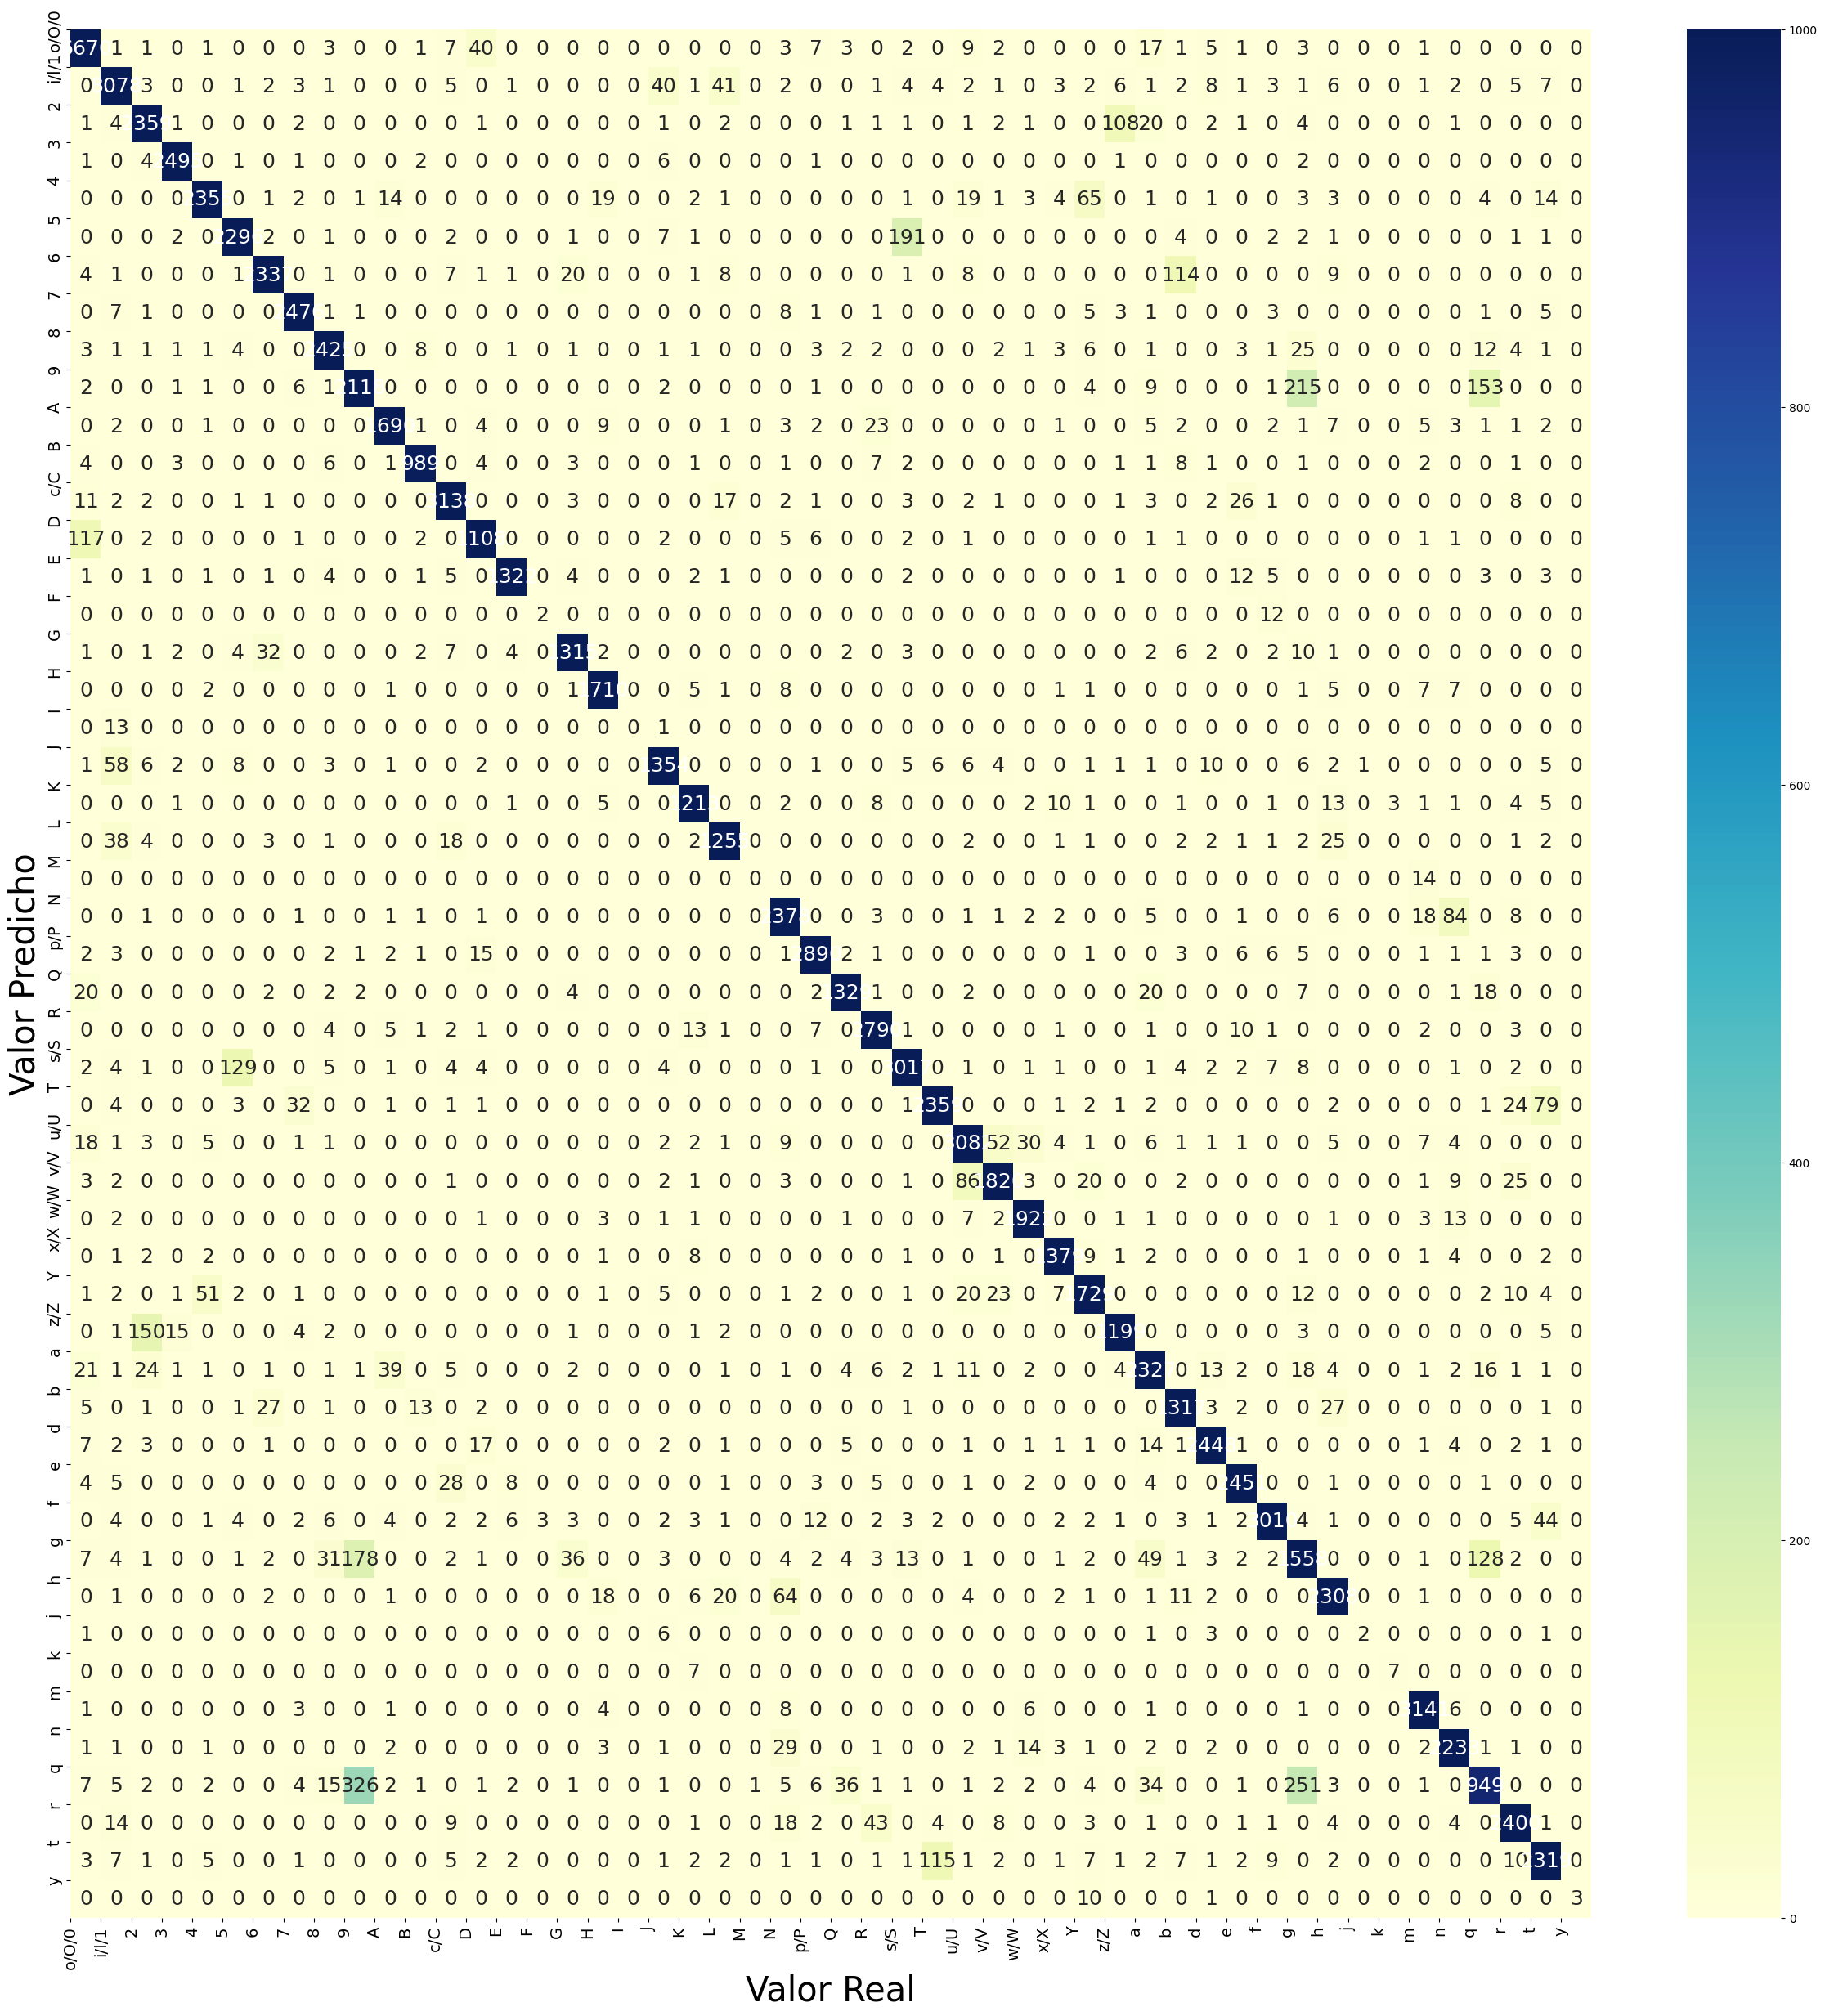

In [294]:
from sklearn.metrics import confusion_matrix

conf_mat = confusion_matrix(y_true=y_test_labels, y_pred=pred_y_test_labels, labels= label_index_1)

import seaborn as sns
plt.figure(figsize=(30, 30))
sns.heatmap(conf_mat, annot=True, annot_kws={"size": 18}, fmt='.0f', vmin=0, vmax=1000, cmap='YlGnBu')

plt.xticks(ticks = list(range(50)), labels=list(label_index_1), fontsize=14, rotation = 'vertical')
plt.yticks(ticks = list(range(50)), labels=list(label_index_1), fontsize=14, rotation = 'vertical')

plt.xlabel('Real Value', fontsize=14)
plt.ylabel('Predicted Value', fontsize=14);

In [ ]:
# mixing up:
# D and O
# 9 and q
# 9 and g
# z and 2
# s and 5
# g and q
# t and T

In [295]:
from sklearn.metrics import classification_report

informe_test = classification_report(y_test_labels, pred_y_test_labels)

print(informe_test)

c:\Users\Emily\anaconda3\envs\myenvsept\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

           2       0.92      0.94      0.93      2514
           3       0.99      0.99      0.99      2514
           4       0.97      0.94      0.95      2514
           5       0.93      0.91      0.92      2514
           6       0.97      0.93      0.95      2514
           7       0.97      0.98      0.98      2514
           8       0.96      0.96      0.96      2514
           9       0.81      0.84      0.82      2514
           A       0.96      0.96      0.96      1766
           B       0.97      0.95      0.96      1036
           D       0.92      0.89      0.90      1250
           E       0.98      0.97      0.97      1369
           F       0.40      0.14      0.21        14
           G       0.94      0.94      0.94      1398
           H       0.96      0.98      0.97      1750
           I       0.00      0.00      0.00        14
           J       0.94      0.91      0.92      1484
           K       0.95    

c:\Users\Emily\anaconda3\envs\myenvsept\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\Emily\anaconda3\envs\myenvsept\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [296]:
from sklearn.metrics import classification_report

informe_valid= classification_report(y_validate_labels, pred_y_validate_labels)

print(informe_valid)

c:\Users\Emily\anaconda3\envs\myenvsept\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

           2       0.93      0.93      0.93      1508
           3       0.99      0.99      0.99      1508
           4       0.97      0.92      0.94      1508
           5       0.94      0.91      0.93      1508
           6       0.97      0.94      0.95      1508
           7       0.98      0.99      0.98      1508
           8       0.96      0.96      0.96      1508
           9       0.80      0.82      0.81      1508
           A       0.96      0.96      0.96      1060
           B       0.95      0.96      0.95       622
           D       0.91      0.88      0.89       750
           E       0.98      0.96      0.97       821
           F       0.67      0.25      0.36         8
           G       0.94      0.94      0.94       839
           H       0.97      0.97      0.97      1050
           I       0.00      0.00      0.00         8
           J       0.93      0.91      0.92       891
           K       0.95    

c:\Users\Emily\anaconda3\envs\myenvsept\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\Emily\anaconda3\envs\myenvsept\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [297]:
from sklearn.metrics import classification_report

informe_train = classification_report(y_train_labels, pred_y_train_labels)

print(informe_train)

c:\Users\Emily\anaconda3\envs\myenvsept\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\Emily\anaconda3\envs\myenvsept\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

           2       0.94      0.95      0.95      7541
           3       0.99      1.00      0.99      7541
           4       0.98      0.95      0.97      7541
           5       0.96      0.92      0.94      7541
           6       0.98      0.94      0.96      7541
           7       0.98      0.99      0.99      7541
           8       0.97      0.98      0.98      7541
           9       0.82      0.85      0.83      7541
           A       0.97      0.98      0.97      5299
           B       0.97      0.98      0.98      3110
           D       0.94      0.91      0.92      3750
           E       0.99      0.98      0.98      4106
           F       0.81      0.32      0.46        41
           G       0.96      0.96      0.96      4196
           H       0.98      0.99      0.98      5249
           I       0.00      0.00      0.00        41
           J       0.96      0.94      0.95      4453
           K       0.97    

c:\Users\Emily\anaconda3\envs\myenvsept\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [2]:
# some labels only have 41 train samples, while others have more than 5000. Why is this?
# after inspecting the Images/dataset files, I realized that some sets mix capital and lowercase letters
# These are the mixed sets which I did not mix in my original data. 
    # f, i, J, K, m, Y
# What to do about this?
    # 2 options:
        # 1. Edit my labels to match the dataset.
        # 2. Train a model to differentiate m and M, for example, and apply it to the data.
# I tried trainging a model to label the m and M in the dataset where all images are labeled m.
# It did a good job classifying the m versus the M, however, For my purposes, 
# differentiating between lowercase and uppercase letters is not the most import thing, because if I want the machine
# to learn my handwriting, most words will be in lowercase anyway and I can later put all letters in lowercase or title case anyway,
# depending on my needs.

In [ ]:
label_path_df = pd.concat([eng, eng_lrg])

In [308]:
m_df = eng_lrg[eng_lrg.label=='m']
m_df.to_csv('data/processed_files/m_df.csv', index=False)

In [309]:
m_M_df = eng.loc[(eng.label == 'm') | (eng.label == 'M')]
m_M_df.to_csv('data/processed_files/m_M_df.csv', index=False)

In [314]:
# Open M classifier

classify_M_model = keras.models.load_model('./models/mM.tf')

In [315]:
# find the ms from eng_lrg in the images_df. Notice the index:

m_df.head()

,label,path
251708,m,data/raw_files/Images/dataset/m/train_4d_00000...
251709,m,data/raw_files/Images/dataset/m/train_4d_00001...
251710,m,data/raw_files/Images/dataset/m/train_4d_00002...
251711,m,data/raw_files/Images/dataset/m/train_4d_00003...
251712,m,data/raw_files/Images/dataset/m/train_4d_00004...


In [326]:
# this is the index where the ms end
m_df.iloc[-1]

label                                                    m
path     data/raw_files/Images/dataset/m/train_6d_02633...
Name: 264341, dtype: object

In [321]:
# add length of small dataframe to index in order to locate the ms in the images_df
eng.shape

(3410, 2)

In [331]:
# check that it is all working - that these are where the m labels are located:

images_df.iloc[251708+3409:251712+3410]

,label,images,labels_update_1,labels_update_2,label_factorized_1,label_factorized_2
251707,l,"[[255.0, 255.0, 255.0, 255.0, 255.0, 255.0, 25...",i/l/1,i/l/1,1,1
251708,m,"[[255.0, 255.0, 255.0, 255.0, 255.0, 255.0, 25...",m,m,44,42
251709,m,"[[255.0, 255.0, 255.0, 255.0, 255.0, 255.0, 25...",m,m,44,42
251710,m,"[[255.0, 255.0, 255.0, 255.0, 255.0, 255.0, 25...",m,m,44,42
251711,m,"[[255.0, 255.0, 255.0, 255.0, 255.0, 255.0, 25...",m,m,44,42


In [330]:
# this is the end of the m labels

images_df.iloc[264341+3410:264341+3412]

,label,images,labels_update_1,labels_update_2,label_factorized_1,label_factorized_2
264341,m,"[[255.0, 255.0, 255.0, 255.0, 255.0, 255.0, 25...",m,m,44,42
264342,n,"[[255.0, 255.0, 255.0, 255.0, 255.0, 255.0, 25...",n,n,45,43


In [ ]:
# Everything looks good - now, make predictions on the ms and add a new column for the predicted values

In [335]:
# prepare images for the prediction

x = [val for val in images_df.iloc[251708+3410:264341+3411].images.values]
x = np.array(x)
x = x.reshape(x.shape[0],x.shape[1],x.shape[2],1)
x_norm = x/255

In [336]:
predictions = classify_M_model.predict(x_norm)

395/395 [==============================] - 6s 16ms/step


In [342]:
m_pred_labels = [['m', 'M'][predictions[i].argmax()] for i in range(len(predictions))]

In [343]:
# add the predictions to the dataframe in the correct rows (by using the index number)

new_prediction_column = [val for val in images_df.label]
index_counter = 251708+3410
pred_counter = 0

while index_counter < 264341+3411:
    new_prediction_column[index_counter] = m_pred_labels[pred_counter]
    index_counter += 1
    pred_counter += 1

In [346]:
# this should be either an m or an M if everything is working

new_prediction_column[index_counter-200]

'm'

In [347]:
# add m predictions to the dataframe 

images_df['new_predicted_labels'] = new_prediction_column

In [355]:
# value counts of m and M predictions. Many more ms than Ms. 
print(images_df['new_predicted_labels'].value_counts().reset_index()[images_df['new_predicted_labels'].value_counts().reset_index()['index']=='m'])
images_df['new_predicted_labels'].value_counts().reset_index()[images_df['new_predicted_labels'].value_counts().reset_index()['index']=='M']

  index  new_predicted_labels
7     m                 11566


,index,new_predicted_labels
47,M,1178


In [ ]:
# This dataframe can be resplit and retrained in order to account for the new M labels. 
# However, this does not seem to be the biggest priority in terms of understanding handwriting,
# because people usually write in lowercase anyway. 

In [360]:
# these are the original labels used in the large dataset:
# Let's add a column for these labels in the dataframe, and train a new model. 

print(list(eng_lrg.label.unique()))

['0', '1', '2', '3', '4', '5', '6', '7', '8', '9', 'a', 'A', 'b', 'B', 'c', 'd', 'D', 'e', 'E', 'f', 'g', 'G', 'h', 'H', 'i', 'J', 'K', 'L', 'l', 'm', 'n', 'N', 'o', 'p', 'q', 'Q', 'r', 'R', 'S', 't', 'T', 'U', 'V', 'W', 'X', 'Y', 'z']


In [357]:
images_df.label.unique()

array(['0', '1', '2', '3', '4', '5', '6', '7', '8', '9', 'A', 'B', 'C',
       'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 'L', 'M', 'N', 'O', 'P',
       'Q', 'R', 'S', 'T', 'U', 'V', 'W', 'X', 'Y', 'Z', 'a', 'b', 'c',
       'd', 'e', 'f', 'g', 'h', 'i', 'j', 'k', 'l', 'm', 'n', 'o', 'p',
       'q', 'r', 's', 't', 'u', 'v', 'w', 'x', 'y', 'z'], dtype=object)

In [377]:
label_dict = dict(list(zip(list(images_df.label.unique()), list(images_df.label.unique()))))

In [378]:
label_dict['C'] = 'c'
label_dict['F'] = 'f'
label_dict['I'] = 'i/l/1'
label_dict['i'] = 'i/l/1'
label_dict['l'] = 'i/l/1'
label_dict['1'] = 'i/l/1'
label_dict['J'] = 'j'
label_dict['K'] = 'k'
label_dict['M'] = 'm'
label_dict['O'] = 'o'
label_dict['0'] = 'o'
label_dict['P'] = 'p'
label_dict['S'] = 's'
label_dict['U'] = 'u'
label_dict['V'] = 'v'
label_dict['W'] = 'w'
label_dict['X'] = 'x'
label_dict['Y'] = 'y'
label_dict['Z'] = 'z'

In [379]:
print(label_dict)

{'0': 'o', '1': 'i/l/1', '2': '2', '3': '3', '4': '4', '5': '5', '6': '6', '7': '7', '8': '8', '9': '9', 'A': 'A', 'B': 'B', 'C': 'c', 'D': 'D', 'E': 'E', 'F': 'f', 'G': 'G', 'H': 'H', 'I': 'i/l/1', 'J': 'j', 'K': 'k', 'L': 'L', 'M': 'm', 'N': 'N', 'O': 'o', 'P': 'p', 'Q': 'Q', 'R': 'R', 'S': 's', 'T': 'T', 'U': 'u', 'V': 'v', 'W': 'w', 'X': 'x', 'Y': 'y', 'Z': 'z', 'a': 'a', 'b': 'b', 'c': 'c', 'd': 'd', 'e': 'e', 'f': 'f', 'g': 'g', 'h': 'h', 'i': 'i/l/1', 'j': 'j', 'k': 'k', 'l': 'i/l/1', 'm': 'm', 'n': 'n', 'o': 'o', 'p': 'p', 'q': 'q', 'r': 'r', 's': 's', 't': 't', 'u': 'u', 'v': 'v', 'w': 'w', 'x': 'x', 'y': 'y', 'z': 'z'}


In [380]:
images_df['labels_update_3'] = images_df.label.map(label_dict)

In [384]:
images_df.sample(7)

,label,images,labels_update_1,labels_update_2,label_factorized_1,label_factorized_2,new_predicted_labels,labels_update_3
396715,V,"[[255.0, 255.0, 255.0, 44.62500000000007, 0.0,...",v/V,v/V,30,30,V,v
195865,G,"[[255.0, 255.0, 255.0, 255.0, 255.0, 255.0, 25...",G,G,16,16,G,G
200711,h,"[[255.0, 255.0, 255.0, 255.0, 255.0, 255.0, 25...",h,h,41,41,h,h
108032,a,"[[255, 255, 255, 255, 255, 255, 255, 255, 255,...",a,a,35,35,a,a
54618,5,"[[255.0, 255.0, 255.0, 255.0, 255.0, 255.0, 25...",5,5,5,5,5,5
317982,q,"[[255.0, 255.0, 255.0, 255.0, 255.0, 255.0, 25...",q,q,46,44,q,q
84651,8,"[[255.0, 255.0, 255.0, 255.0, 255.0, 255.0, 25...",8,8,8,8,8,8


In [385]:
# create and train a new model

In [391]:
img_size = 40

X = [val for val in images_df.images.values]

y_original = images_df['labels_update_3']

y, label_array = pd.factorize(y_original)

x_train, x_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, stratify=y, random_state=22)

#print("Shape of training data:", x_train.shape)
#print("Shape of testing data:", x_test.shape)

#x_train, x_test, y_train, y_test = train_test_split([val[0] for val in X], y, test_size = 0.25, stratify=y, random_state=22)

x_train = np.array(x_train)
x_test = np.array(x_test)

print("Shape of training data:", x_train.shape)
print("Shape of testing data:", x_test.shape)

x_train = x_train.reshape(x_train.shape[0],x_train.shape[1],x_train.shape[2],1)
x_test = x_test.reshape(x_test.shape[0], x_test.shape[1], x_test.shape[2],1)
print("New shape of training data:", x_train.shape)
print("New shape of testing data:", x_test.shape)

print('amount of labels:', len(set(label_array)))

classes_n = len(set(label_array))

y_training = to_categorical(y_train, num_classes = classes_n, dtype='int')
y_testing = to_categorical(y_test, num_classes = classes_n, dtype='int')

x_train_norm = x_train/255
x_test_norm = x_test/255

x_train_norm_train, x_validate, y_training_train, y_validate = train_test_split(x_train_norm, y_training, test_size = 0.20, stratify=y_training, random_state=22)

Shape of training data: (321399, 40, 40)
Shape of testing data: (107133, 40, 40)
New shape of training data: (321399, 40, 40, 1)
New shape of testing data: (107133, 40, 40, 1)
amount of labels: 44


In [392]:
def define_model3(input_img_size=40, output_size=44):
    model = Sequential()
    model.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', input_shape=(input_img_size, input_img_size, 1)))
    model.add(BatchNormalization())
    model.add(MaxPool2D((2, 2)))
    model.add(Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform'))
    model.add(Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform'))
    model.add(MaxPool2D((2, 2)))
    model.add(Flatten())
    model.add(Dense(100, activation='relu', kernel_initializer='he_uniform'))
    model.add(BatchNormalization())
    model.add(Dense(output_size, activation='softmax'))
    return model


model3 = define_model3()
opt = SGD(learning_rate=0.01, momentum=0.9)
model3.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])
history = model3.fit(x_train_norm_train, y_training_train, epochs=7,  validation_data = (x_validate,y_validate))

Epoch 1/7
8035/8035 [==============================] - 574s 71ms/step - loss: 0.3838 - accuracy: 0.8918 - val_loss: 0.2662 - val_accuracy: 0.9228
Epoch 2/7
8035/8035 [==============================] - 602s 75ms/step - loss: 0.2362 - accuracy: 0.9308 - val_loss: 0.2223 - val_accuracy: 0.9342
Epoch 3/7
8035/8035 [==============================] - 605s 75ms/step - loss: 0.2010 - accuracy: 0.9400 - val_loss: 0.2061 - val_accuracy: 0.9398
Epoch 4/7
8035/8035 [==============================] - 608s 76ms/step - loss: 0.1799 - accuracy: 0.9457 - val_loss: 0.2069 - val_accuracy: 0.9394
Epoch 5/7
8035/8035 [==============================] - 588s 73ms/step - loss: 0.1632 - accuracy: 0.9498 - val_loss: 0.1965 - val_accuracy: 0.9439
Epoch 6/7
8035/8035 [==============================] - 568s 71ms/step - loss: 0.1485 - accuracy: 0.9540 - val_loss: 0.2086 - val_accuracy: 0.9414
Epoch 7/7
8035/8035 [==============================] - 537s 67ms/step - loss: 0.1368 - accuracy: 0.9568 - val_loss: 0.2025 -

In [393]:
model3.evaluate(x_test_norm, y_testing)

3348/3348 [==============================] - 56s 17ms/step - loss: 0.2033 - accuracy: 0.9427


[0.2033235728740692, 0.9426974058151245]

In [394]:
model3.save('./models/all_data_44_labels.tf')

INFO:tensorflow:Assets written to: ./models/all_data_44_labels.tf\assets


INFO:tensorflow:Assets written to: ./models/all_data_44_labels.tf\assets


In [395]:
history_model3_df = pd.DataFrame(history.history)
history_model3_df

,loss,accuracy,val_loss,val_accuracy
0,0.383844,0.891836,0.266187,0.922775
1,0.236244,0.930795,0.222317,0.934210
2,0.200973,0.939966,0.206110,0.939841
3,0.179933,0.945694,0.206930,0.939390
4,0.163200,0.949844,0.196504,0.943855
5,0.148490,0.954006,0.208649,0.941366
6,0.136812,0.956794,0.202549,0.943264


In [399]:
1/44

0.022727272727272728

<AxesSubplot:xlabel='labels_update_3', ylabel='count'>

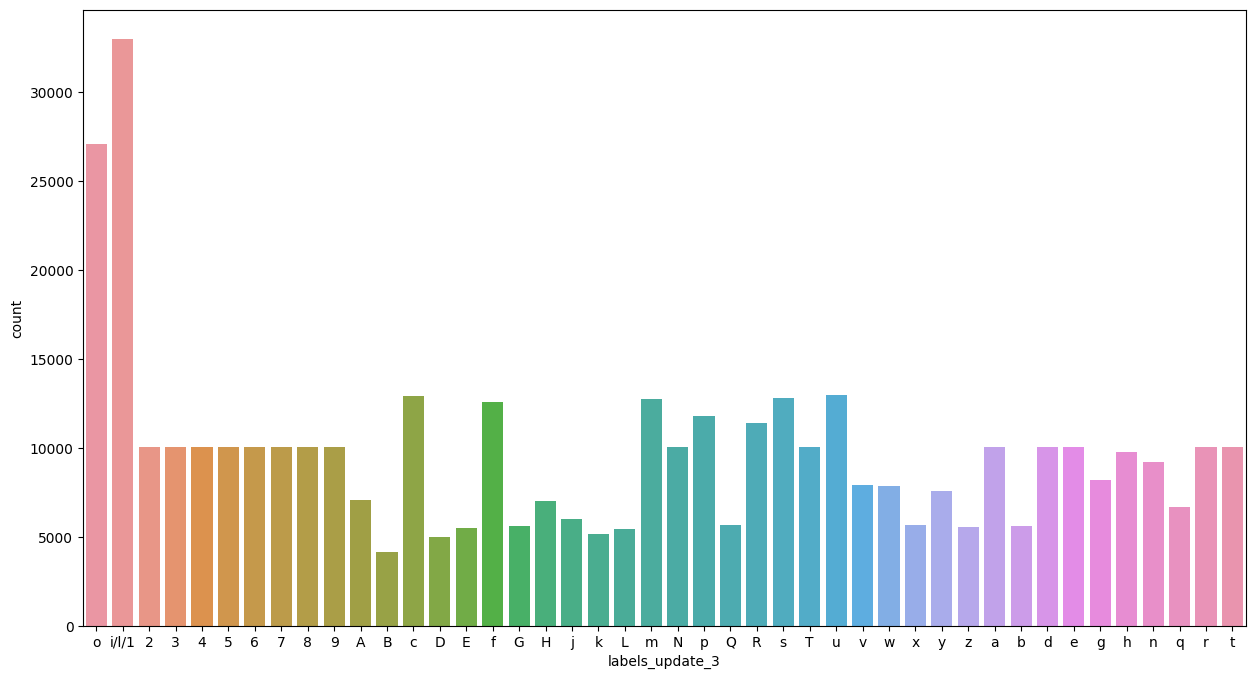

In [415]:
fig, ax = plt.subplots(figsize=(15, 8))
sns.countplot(x=images_df.labels_update_3)

In [416]:
valid_preds = model3.predict(x_validate)
test_preds = model3.predict(x_test_norm)
train_preds = model3.predict(x_train_norm)

10044/10044 [==============================] - 169s 17ms/step


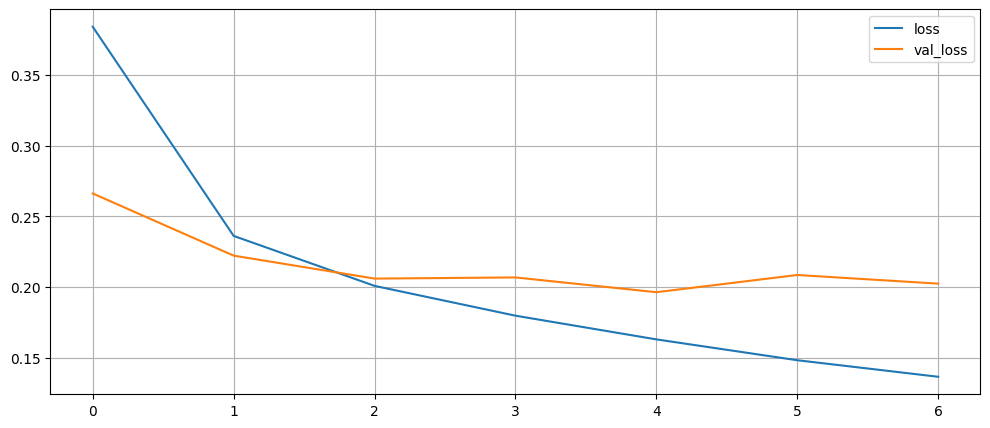

In [417]:
pd.DataFrame(history.history)[['loss', 'val_loss']].plot(figsize=(12, 5))
plt.grid(True)
plt.gca() # set the vertical range to [0-1]
plt.show()

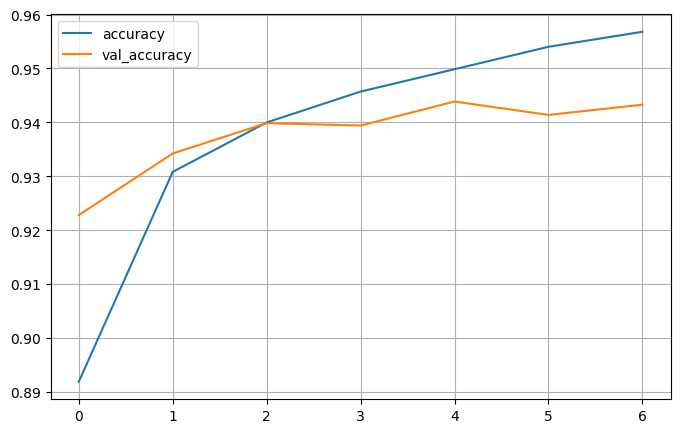

In [418]:
pd.DataFrame(history.history)[['accuracy', 'val_accuracy']].plot(figsize=(8, 5))
plt.grid(True)
plt.gca() # set the vertical range to [0-1]
plt.show()

In [420]:
label_array

Index(['o', 'i/l/1', '2', '3', '4', '5', '6', '7', '8', '9', 'A', 'B', 'c',
       'D', 'E', 'f', 'G', 'H', 'j', 'k', 'L', 'm', 'N', 'p', 'Q', 'R', 's',
       'T', 'u', 'v', 'w', 'x', 'y', 'z', 'a', 'b', 'd', 'e', 'g', 'h', 'n',
       'q', 'r', 't'],
      dtype='object')

In [430]:
y_validate_labels = [label_array[y_validate[i].argmax()] for i in range(len(y_validate))]
y_test_labels = [label_array[y_testing[i].argmax()] for i in range(len(y_testing))]
y_train_labels =  [label_array[y_training[i].argmax()] for i in range(len(y_training))]

pred_y_validate_labels = [label_array[valid_preds[i].argmax()] for i in range(len(valid_preds))]
pred_y_test_labels = [label_array[test_preds[i].argmax()] for i in range(len(test_preds))]
pred_y_train_labels = [label_array[train_preds[i].argmax()] for i in range(len(train_preds))]

validate_error_counter = dict(zip(list(set(y_validate_labels)),[0 for i in range(44)]))
test_error_counter = dict(zip(list(set(y_validate_labels)),[0 for i in range(44)]))
train_error_counter = dict(zip(list(set(y_validate_labels)),[0 for i in range(44)]))

In [431]:
validate_error_counter2 = dict(zip(list(set(y_validate_labels)),[0 for i in range(44)]))
test_error_counter2 = dict(zip(list(set(y_validate_labels)),[0 for i in range(44)]))
train_error_counter2 = dict(zip(list(set(y_validate_labels)),[0 for i in range(44)]))

In [432]:
for i in range(len(y_validate_labels)):
    if y_validate_labels[i] != pred_y_validate_labels[i]:
        validate_error_counter[y_validate_labels[i]] = validate_error_counter[y_validate_labels[i]]+1

for i in range(len(y_validate_labels)):
    if pred_y_validate_labels[i] != y_validate_labels[i]:
        validate_error_counter2[y_validate_labels[i]] = validate_error_counter2[y_validate_labels[i]]+1

In [437]:
print(validate_error_counter2)

{'2': 86, 'm': 14, 'k': 35, 'G': 22, 'y': 62, '8': 62, '6': 119, 'f': 94, 'z': 102, 'v': 93, 'A': 62, '5': 161, 'b': 83, 'D': 108, 'p': 33, '4': 143, 'n': 34, 'w': 33, '3': 19, 'E': 39, 'o': 77, 'a': 110, 'c': 40, 'H': 18, 's': 103, 'e': 28, 'R': 37, 't': 94, 'd': 40, 'u': 85, 'T': 111, 'j': 92, 'Q': 40, 'r': 80, 'B': 34, 'L': 42, 'i/l/1': 90, 'g': 359, '7': 29, 'x': 31, 'N': 94, '9': 180, 'q': 347, 'h': 82}


In [439]:
valid_error_indexes = []
for i in range(len(y_validate_labels)):
    if y_validate_labels[i] != pred_y_validate_labels[i]:
        valid_error_indexes.append(i)
train_error_indexes = []
for i in range(len(y_train_labels)):
    if y_train_labels[i] != pred_y_train_labels[i]:
        train_error_indexes.append(i)
test_error_indexes = []
for i in range(len(y_test_labels)):
    if y_test_labels[i] != pred_y_test_labels[i]:
        test_error_indexes.append(i)

In [440]:
print(train_error_indexes)

[59, 211, 218, 227, 255, 310, 319, 392, 420, 422, 430, 433, 438, 455, 465, 482, 483, 484, 519, 532, 533, 565, 568, 612, 657, 732, 757, 782, 794, 796, 831, 929, 950, 1007, 1031, 1050, 1051, 1057, 1069, 1077, 1091, 1112, 1124, 1148, 1206, 1250, 1320, 1487, 1504, 1515, 1521, 1528, 1573, 1579, 1626, 1630, 1633, 1637, 1751, 1766, 1773, 1807, 1826, 1827, 1832, 1846, 1890, 1972, 1973, 1980, 1988, 2036, 2037, 2073, 2148, 2162, 2234, 2265, 2323, 2390, 2392, 2406, 2408, 2506, 2507, 2529, 2556, 2570, 2582, 2625, 2635, 2646, 2760, 2771, 2779, 2786, 2826, 2843, 2876, 2923, 2950, 2951, 2960, 2961, 2968, 3055, 3097, 3119, 3120, 3181, 3222, 3223, 3230, 3238, 3276, 3338, 3363, 3430, 3452, 3460, 3483, 3492, 3500, 3511, 3514, 3559, 3638, 3639, 3644, 3753, 3763, 3773, 3783, 3784, 3792, 3815, 3842, 3913, 3958, 3963, 3968, 3974, 4000, 4078, 4142, 4171, 4188, 4287, 4292, 4295, 4347, 4364, 4453, 4471, 4496, 4532, 4595, 4597, 4620, 4690, 4708, 4712, 4786, 4815, 4855, 4901, 4975, 5000, 5068, 5092, 5093, 5115, 5

a a A


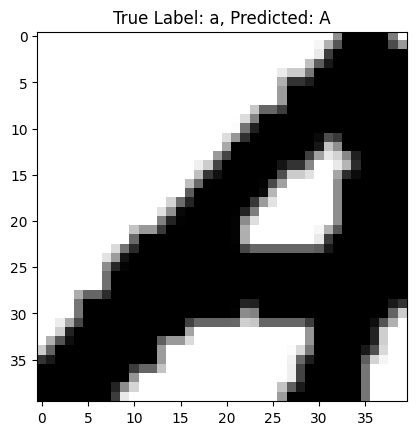

In [451]:
print(label_array[y_train[59]], y_train_labels[59], pred_y_train_labels[59])
plt.title(f'True Label: {y_train_labels[59]}, Predicted: {pred_y_train_labels[59]}')
plt.imshow(x_train[59]);

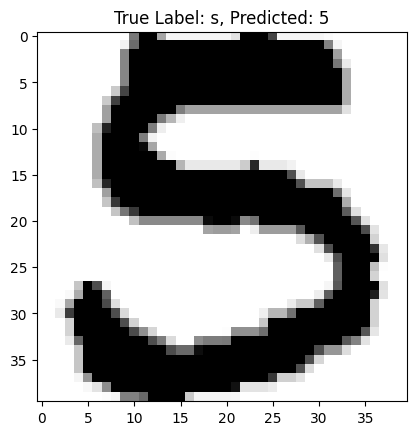

In [453]:
plt.title(f'True Label: {y_train_labels[211]}, Predicted: {pred_y_train_labels[211]}')
plt.imshow(x_train[211]);

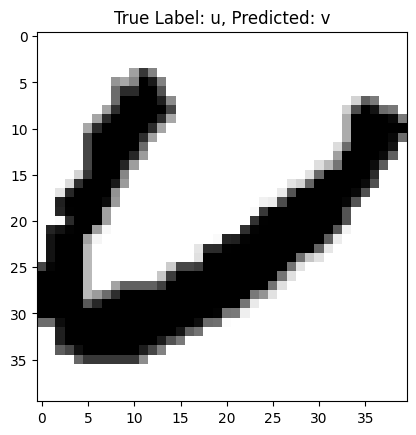

In [454]:
plt.title(f'True Label: {y_train_labels[218]}, Predicted: {pred_y_train_labels[218]}')
plt.imshow(x_train[218]);

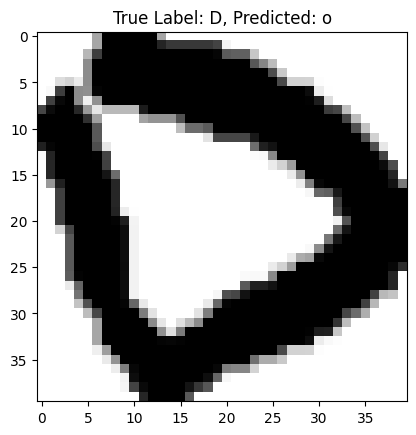

In [457]:
plt.title(f'True Label: {y_train_labels[91003]}, Predicted: {pred_y_train_labels[91003]}')
plt.imshow(x_train[91003]);

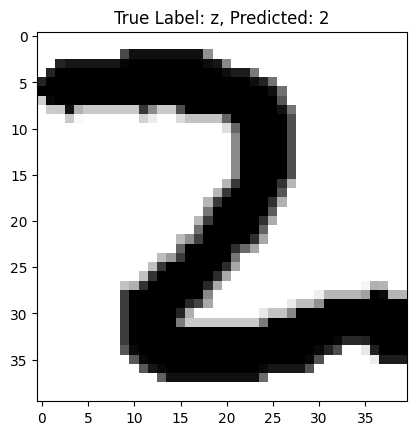

In [458]:
plt.title(f'True Label: {y_train_labels[321317]}, Predicted: {pred_y_train_labels[321317]}')
plt.imshow(x_train[321317]);

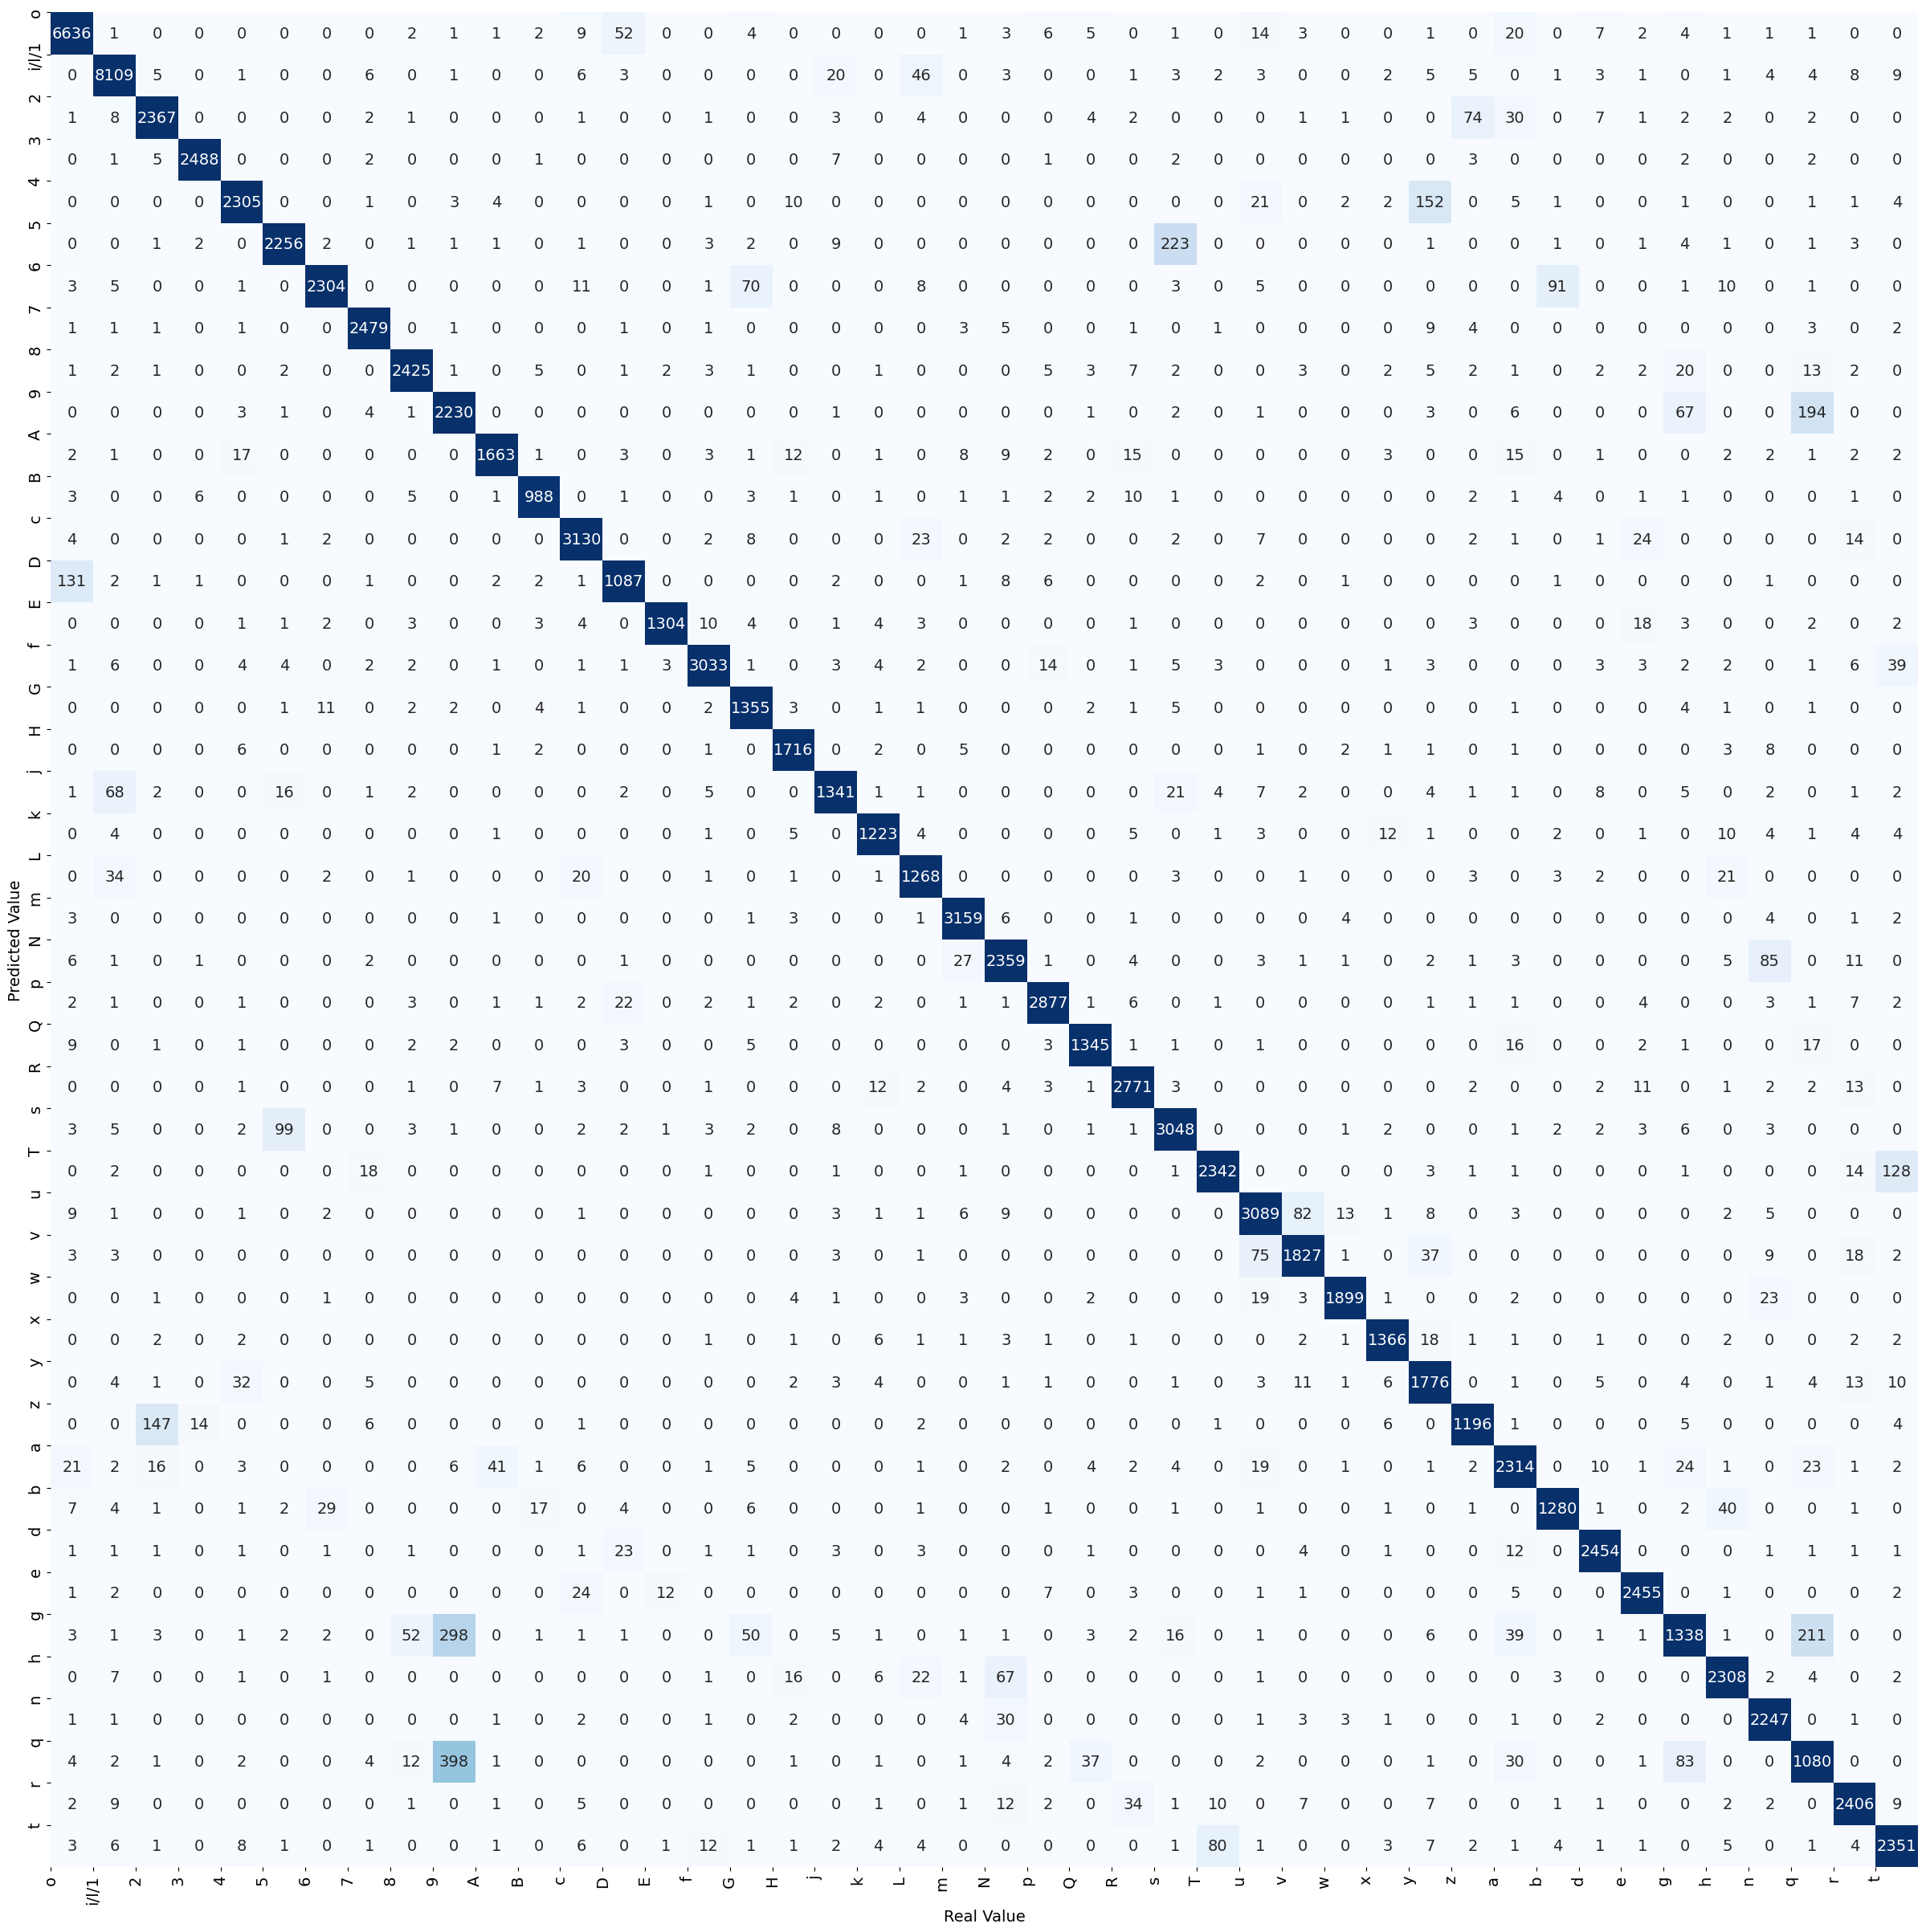

In [428]:
from sklearn.metrics import confusion_matrix

conf_mat = confusion_matrix(y_true=y_test_labels, y_pred=pred_y_test_labels, labels= label_array)

plt.figure(figsize=(30, 30))
sns.heatmap(conf_mat, annot=True, annot_kws={"size": 14}, fmt='.0f', vmin=0, vmax=1000, cbar=False, cmap='Blues')

plt.xticks(ticks = list(range(44)), labels=list(label_array), fontsize=14, rotation = 'vertical')
plt.yticks(ticks = list(range(44)), labels=list(label_array), fontsize=14, rotation = 'vertical')

plt.xlabel('Real Value', fontsize=14)
plt.ylabel('Predicted Value', fontsize=14);

In [429]:
from sklearn.metrics import classification_report

informe_test = classification_report(y_test_labels, pred_y_test_labels)

print(informe_test)

              precision    recall  f1-score   support

           2       0.93      0.94      0.93      2514
           3       0.99      0.99      0.99      2514
           4       0.96      0.92      0.94      2514
           5       0.95      0.90      0.92      2514
           6       0.98      0.92      0.95      2514
           7       0.98      0.99      0.98      2514
           8       0.96      0.96      0.96      2514
           9       0.76      0.89      0.82      2514
           A       0.96      0.94      0.95      1766
           B       0.96      0.95      0.96      1036
           D       0.90      0.87      0.88      1250
           E       0.99      0.95      0.97      1369
           G       0.89      0.97      0.93      1398
           H       0.96      0.98      0.97      1750
           L       0.91      0.93      0.92      1361
           N       0.93      0.94      0.94      2514
           Q       0.95      0.95      0.95      1410
           R       0.97    

In [3]:
# import model3 (because the kernal restarted)
best_model = keras.models.load_model('./models/all_data_44_labels.tf')

In [10]:
# import my handwritten letters (letters and numbers written by my friends, family, and me)
all_written_images = []
for filename in os.listdir(path='./data/processed_files/My_letters_digits'):
    all_written_images.append(f'./data/processed_files/My_letters_digits/{filename}')

In [11]:
my_letters_df = pd.DataFrame()

In [12]:
my_letters_df['path'] = all_written_images

In [13]:
len(my_letters_df), my_letters_df.iloc[141].path

(263, './data/processed_files/My_letters_digits/img225.png')

In [56]:
my_letters_df.to_csv('./data/processed_files/DataFrames/my_letters_path.csv', index=False)

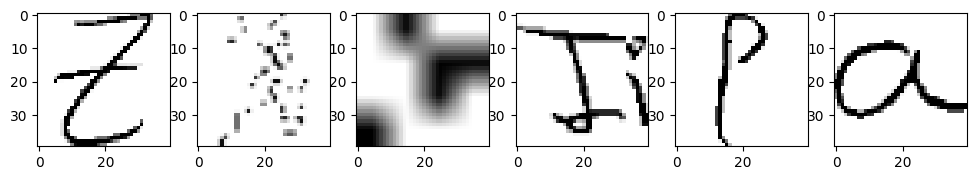

In [16]:
fig, ax = plt.subplots(nrows=1, ncols=6, figsize=(12, 5))
ax[0].imshow(cv2.imread(my_letters_df['path'].iloc[141]))
ax[1].imshow(cv2.imread(my_letters_df['path'].iloc[200]))
ax[2].imshow(cv2.imread(my_letters_df['path'].iloc[0]))
ax[3].imshow(cv2.imread(my_letters_df['path'].iloc[150]))
ax[4].imshow(cv2.imread(my_letters_df['path'].iloc[56]))
ax[5].imshow(cv2.imread(my_letters_df['path'].iloc[240]))

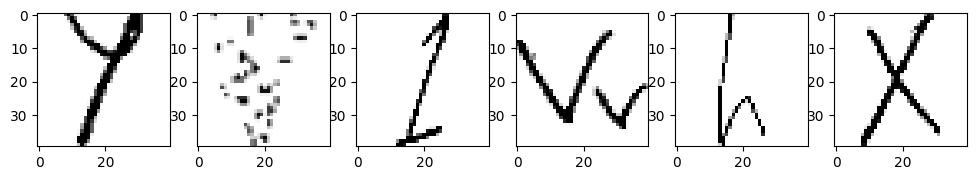

In [20]:
fig, ax = plt.subplots(nrows=1, ncols=6, figsize=(12, 5))
ax[0].imshow(cv2.imread(my_letters_df['path'].iloc[140]))
ax[1].imshow(cv2.imread(my_letters_df['path'].iloc[199]))
ax[2].imshow(cv2.imread(my_letters_df['path'].iloc[9]))
ax[3].imshow(cv2.imread(my_letters_df['path'].iloc[149]))
ax[4].imshow(cv2.imread(my_letters_df['path'].iloc[55]))
ax[5].imshow(cv2.imread(my_letters_df['path'].iloc[239]))

In [21]:
# Some of the writing came out like dots or blurs and some didn't separate correctly, but overall it turned out well enough to make some predictions!

In [42]:
z = cv2.split(cv2.imread(my_letters_df['path'].iloc[141]))[0].reshape(1, 40,40,1)/255

In [43]:
z.shape

(1, 40, 40, 1)

In [47]:
label_index = ['o', 'i/l/1', '2', '3', '4', '5', '6', '7', '8', '9', 'A', 'B', 'c',
       'D', 'E', 'f', 'G', 'H', 'j', 'k', 'L', 'm', 'N', 'p', 'Q', 'R', 's',
       'T', 'u', 'v', 'w', 'x', 'y', 'z', 'a', 'b', 'd', 'e', 'g', 'h', 'n',
       'q', 'r', 't']

In [48]:
pred = best_model.predict(z)
label_index[pred.argmax()]

1/1 [==============================] - 0s 21ms/step


'z'

In [49]:
p =  cv2.split(cv2.imread(my_letters_df['path'].iloc[56]))[0].reshape(1, 40,40,1)/255
a =  cv2.split(cv2.imread(my_letters_df['path'].iloc[240]))[0].reshape(1, 40,40,1)/255

In [50]:
label_index[best_model.predict(a).argmax()]

1/1 [==============================] - 0s 15ms/step


'a'

In [51]:
label_index[best_model.predict(p).argmax()]

1/1 [==============================] - 0s 29ms/step


'p'

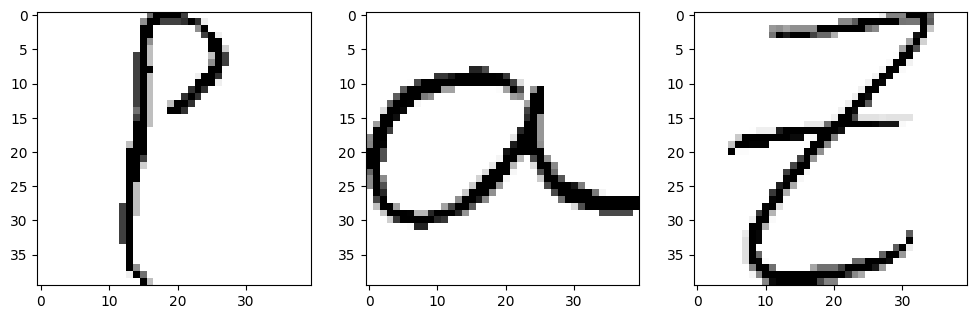

In [53]:
fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(12, 5))
ax[0].imshow(cv2.imread(my_letters_df['path'].iloc[56]))
ax[1].imshow(cv2.imread(my_letters_df['path'].iloc[240]))
ax[2].imshow(cv2.imread(my_letters_df['path'].iloc[141]))

In [54]:
peace = label_index[best_model.predict(p).argmax()], label_index[best_model.predict(a).argmax()], label_index[best_model.predict(z).argmax()]
peace = ''.join(peace)
print(peace)

1/1 [==============================] - 0s 25ms/step
paz


Text(0.5, 1.0, '229')

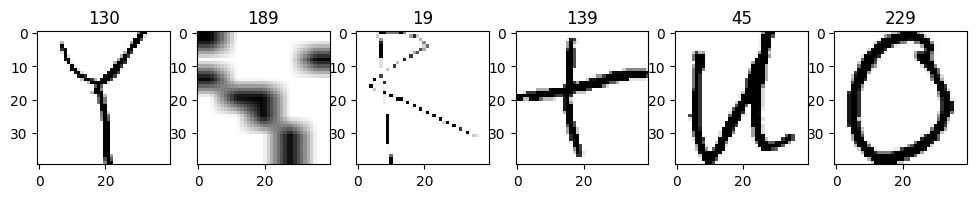

In [59]:
fig, ax = plt.subplots(nrows=1, ncols=6, figsize=(12, 5))
ax[0].imshow(cv2.imread(my_letters_df['path'].iloc[130]))
ax[0].set_title('130')
ax[1].imshow(cv2.imread(my_letters_df['path'].iloc[189]))
ax[1].set_title('189')
ax[2].imshow(cv2.imread(my_letters_df['path'].iloc[19]))
ax[2].set_title('19')
ax[3].imshow(cv2.imread(my_letters_df['path'].iloc[139]))
ax[3].set_title('139')
ax[4].imshow(cv2.imread(my_letters_df['path'].iloc[45]))
ax[4].set_title('45')
ax[5].imshow(cv2.imread(my_letters_df['path'].iloc[229]))
ax[5].set_title('229')

In [62]:
y =  cv2.split(cv2.imread(my_letters_df['path'].iloc[130]))[0].reshape(1, 40,40,1)/255
Rr =  cv2.split(cv2.imread(my_letters_df['path'].iloc[19]))[0].reshape(1, 40,40,1)/255
t =  cv2.split(cv2.imread(my_letters_df['path'].iloc[139]))[0].reshape(1, 40,40,1)/255
u =  cv2.split(cv2.imread(my_letters_df['path'].iloc[45]))[0].reshape(1, 40,40,1)/255
o =  cv2.split(cv2.imread(my_letters_df['path'].iloc[229]))[0].reshape(1, 40,40,1)/255

word = label_index[best_model.predict(y).argmax()], label_index[best_model.predict(Rr).argmax()], label_index[best_model.predict(t).argmax()], label_index[best_model.predict(u).argmax()], label_index[best_model.predict(o).argmax()]
word = ' '.join(word)
print(word)

1/1 [==============================] - 0s 25ms/step
y i/l/1 t u o


In [63]:
# it predicted the R as an i/I

Text(0.5, 1.0, '128')

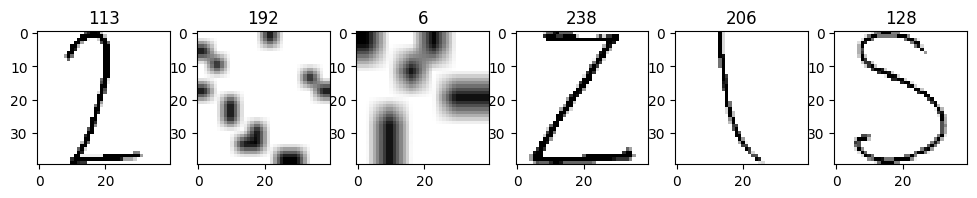

In [65]:
random_values = [random.randint(0, len(my_letters_df)-1) for i in range(6)]

fig, ax = plt.subplots(nrows=1, ncols=6, figsize=(12, 5))

ax[0].imshow(cv2.imread(my_letters_df['path'].iloc[random_values[0]]))
ax[0].set_title(str(random_values[0]))
ax[1].imshow(cv2.imread(my_letters_df['path'].iloc[random_values[1]]))
ax[1].set_title(str(random_values[1]))
ax[2].imshow(cv2.imread(my_letters_df['path'].iloc[random_values[2]]))
ax[2].set_title(str(random_values[2]))
ax[3].imshow(cv2.imread(my_letters_df['path'].iloc[random_values[3]]))
ax[3].set_title(str(random_values[3]))
ax[4].imshow(cv2.imread(my_letters_df['path'].iloc[random_values[4]]))
ax[4].set_title(str(random_values[4]))
ax[5].imshow(cv2.imread(my_letters_df['path'].iloc[random_values[5]]))
ax[5].set_title(str(random_values[5]))

In [68]:
word = [label_index[best_model.predict(cv2.split(cv2.imread(my_letters_df['path'].iloc[random_values[0]]))[0].reshape(1, 40,40,1)/255).argmax()], 
label_index[best_model.predict(cv2.split(cv2.imread(my_letters_df['path'].iloc[random_values[3]]))[0].reshape(1, 40,40,1)/255).argmax()],
label_index[best_model.predict(cv2.split(cv2.imread(my_letters_df['path'].iloc[random_values[4]]))[0].reshape(1, 40,40,1)/255).argmax()],
label_index[best_model.predict(cv2.split(cv2.imread(my_letters_df['path'].iloc[random_values[5]]))[0].reshape(1, 40,40,1)/255).argmax()]]
print(word)

1/1 [==============================] - 0s 25ms/step
['2', 'z', 'i/l/1', 's']


Text(0.5, 1.0, '117')

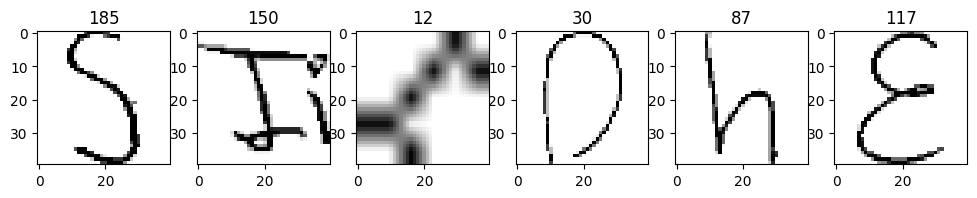

In [69]:
random_values = [random.randint(0, len(my_letters_df)-1) for i in range(6)]

fig, ax = plt.subplots(nrows=1, ncols=6, figsize=(12, 5))

ax[0].imshow(cv2.imread(my_letters_df['path'].iloc[random_values[0]]))
ax[0].set_title(str(random_values[0]))
ax[1].imshow(cv2.imread(my_letters_df['path'].iloc[random_values[1]]))
ax[1].set_title(str(random_values[1]))
ax[2].imshow(cv2.imread(my_letters_df['path'].iloc[random_values[2]]))
ax[2].set_title(str(random_values[2]))
ax[3].imshow(cv2.imread(my_letters_df['path'].iloc[random_values[3]]))
ax[3].set_title(str(random_values[3]))
ax[4].imshow(cv2.imread(my_letters_df['path'].iloc[random_values[4]]))
ax[4].set_title(str(random_values[4]))
ax[5].imshow(cv2.imread(my_letters_df['path'].iloc[random_values[5]]))
ax[5].set_title(str(random_values[5]))

In [70]:
word = [label_index[best_model.predict(cv2.split(cv2.imread(my_letters_df['path'].iloc[random_values[0]]))[0].reshape(1, 40,40,1)/255).argmax()], 
label_index[best_model.predict(cv2.split(cv2.imread(my_letters_df['path'].iloc[random_values[1]]))[0].reshape(1, 40,40,1)/255).argmax()],
label_index[best_model.predict(cv2.split(cv2.imread(my_letters_df['path'].iloc[random_values[3]]))[0].reshape(1, 40,40,1)/255).argmax()],
label_index[best_model.predict(cv2.split(cv2.imread(my_letters_df['path'].iloc[random_values[4]]))[0].reshape(1, 40,40,1)/255).argmax()],
label_index[best_model.predict(cv2.split(cv2.imread(my_letters_df['path'].iloc[random_values[5]]))[0].reshape(1, 40,40,1)/255).argmax()]]
print(word)

1/1 [==============================] - 0s 22ms/step
['g', 'i/l/1', 'o', 'h', 'E']


Text(0.5, 1.0, '55')

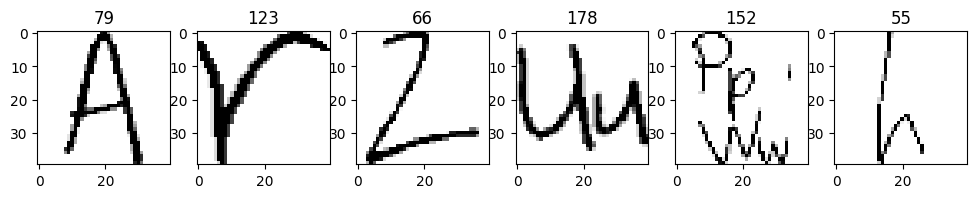

In [72]:
random_values = [random.randint(0, len(my_letters_df)-1) for i in range(6)]

fig, ax = plt.subplots(nrows=1, ncols=6, figsize=(12, 5))

ax[0].imshow(cv2.imread(my_letters_df['path'].iloc[random_values[0]]))
ax[0].set_title(str(random_values[0]))
ax[1].imshow(cv2.imread(my_letters_df['path'].iloc[random_values[1]]))
ax[1].set_title(str(random_values[1]))
ax[2].imshow(cv2.imread(my_letters_df['path'].iloc[random_values[2]]))
ax[2].set_title(str(random_values[2]))
ax[3].imshow(cv2.imread(my_letters_df['path'].iloc[random_values[3]]))
ax[3].set_title(str(random_values[3]))
ax[4].imshow(cv2.imread(my_letters_df['path'].iloc[random_values[4]]))
ax[4].set_title(str(random_values[4]))
ax[5].imshow(cv2.imread(my_letters_df['path'].iloc[random_values[5]]))
ax[5].set_title(str(random_values[5]))

In [73]:
word = [label_index[best_model.predict(cv2.split(cv2.imread(my_letters_df['path'].iloc[random_values[0]]))[0].reshape(1, 40,40,1)/255).argmax()], 
label_index[best_model.predict(cv2.split(cv2.imread(my_letters_df['path'].iloc[random_values[1]]))[0].reshape(1, 40,40,1)/255).argmax()],
label_index[best_model.predict(cv2.split(cv2.imread(my_letters_df['path'].iloc[random_values[2]]))[0].reshape(1, 40,40,1)/255).argmax()],
label_index[best_model.predict(cv2.split(cv2.imread(my_letters_df['path'].iloc[random_values[3]]))[0].reshape(1, 40,40,1)/255).argmax()],
label_index[best_model.predict(cv2.split(cv2.imread(my_letters_df['path'].iloc[random_values[5]]))[0].reshape(1, 40,40,1)/255).argmax()]]
print(word)

1/1 [==============================] - 0s 16ms/step
['A', 'r', 'z', 'w', 'h']


Text(0.5, 1.0, '214')

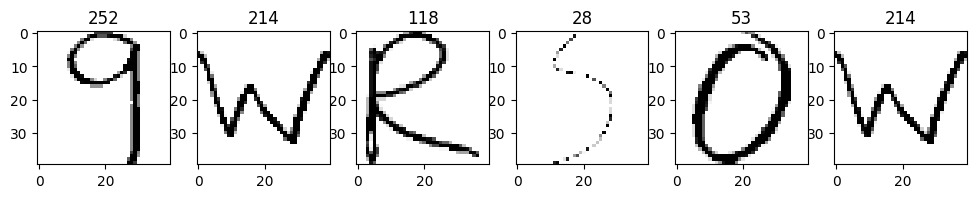

In [74]:
random_values = [random.randint(0, len(my_letters_df)-1) for i in range(6)]

fig, ax = plt.subplots(nrows=1, ncols=6, figsize=(12, 5))

ax[0].imshow(cv2.imread(my_letters_df['path'].iloc[random_values[0]]))
ax[0].set_title(str(random_values[0]))
ax[1].imshow(cv2.imread(my_letters_df['path'].iloc[random_values[1]]))
ax[1].set_title(str(random_values[1]))
ax[2].imshow(cv2.imread(my_letters_df['path'].iloc[random_values[2]]))
ax[2].set_title(str(random_values[2]))
ax[3].imshow(cv2.imread(my_letters_df['path'].iloc[random_values[3]]))
ax[3].set_title(str(random_values[3]))
ax[4].imshow(cv2.imread(my_letters_df['path'].iloc[random_values[4]]))
ax[4].set_title(str(random_values[4]))
ax[5].imshow(cv2.imread(my_letters_df['path'].iloc[random_values[5]]))
ax[5].set_title(str(random_values[5]))

In [75]:
word = [label_index[best_model.predict(cv2.split(cv2.imread(my_letters_df['path'].iloc[random_values[0]]))[0].reshape(1, 40,40,1)/255).argmax()], 
label_index[best_model.predict(cv2.split(cv2.imread(my_letters_df['path'].iloc[random_values[1]]))[0].reshape(1, 40,40,1)/255).argmax()],
label_index[best_model.predict(cv2.split(cv2.imread(my_letters_df['path'].iloc[random_values[2]]))[0].reshape(1, 40,40,1)/255).argmax()],
label_index[best_model.predict(cv2.split(cv2.imread(my_letters_df['path'].iloc[random_values[3]]))[0].reshape(1, 40,40,1)/255).argmax()],
label_index[best_model.predict(cv2.split(cv2.imread(my_letters_df['path'].iloc[random_values[4]]))[0].reshape(1, 40,40,1)/255).argmax()],
label_index[best_model.predict(cv2.split(cv2.imread(my_letters_df['path'].iloc[random_values[5]]))[0].reshape(1, 40,40,1)/255).argmax()]]
print(word)

1/1 [==============================] - 0s 25ms/step
['9', 'w', 'R', 'i/l/1', 'o', 'w']


Text(0.5, 1.0, '34')

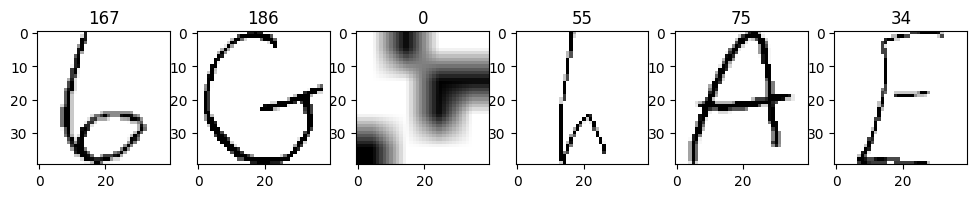

In [76]:
random_values = [random.randint(0, len(my_letters_df)-1) for i in range(6)]

fig, ax = plt.subplots(nrows=1, ncols=6, figsize=(12, 5))

ax[0].imshow(cv2.imread(my_letters_df['path'].iloc[random_values[0]]))
ax[0].set_title(str(random_values[0]))
ax[1].imshow(cv2.imread(my_letters_df['path'].iloc[random_values[1]]))
ax[1].set_title(str(random_values[1]))
ax[2].imshow(cv2.imread(my_letters_df['path'].iloc[random_values[2]]))
ax[2].set_title(str(random_values[2]))
ax[3].imshow(cv2.imread(my_letters_df['path'].iloc[random_values[3]]))
ax[3].set_title(str(random_values[3]))
ax[4].imshow(cv2.imread(my_letters_df['path'].iloc[random_values[4]]))
ax[4].set_title(str(random_values[4]))
ax[5].imshow(cv2.imread(my_letters_df['path'].iloc[random_values[5]]))
ax[5].set_title(str(random_values[5]))

In [77]:
word = [label_index[best_model.predict(cv2.split(cv2.imread(my_letters_df['path'].iloc[random_values[0]]))[0].reshape(1, 40,40,1)/255).argmax()], 
label_index[best_model.predict(cv2.split(cv2.imread(my_letters_df['path'].iloc[random_values[1]]))[0].reshape(1, 40,40,1)/255).argmax()],
label_index[best_model.predict(cv2.split(cv2.imread(my_letters_df['path'].iloc[random_values[2]]))[0].reshape(1, 40,40,1)/255).argmax()],
label_index[best_model.predict(cv2.split(cv2.imread(my_letters_df['path'].iloc[random_values[3]]))[0].reshape(1, 40,40,1)/255).argmax()],
label_index[best_model.predict(cv2.split(cv2.imread(my_letters_df['path'].iloc[random_values[4]]))[0].reshape(1, 40,40,1)/255).argmax()],
label_index[best_model.predict(cv2.split(cv2.imread(my_letters_df['path'].iloc[random_values[5]]))[0].reshape(1, 40,40,1)/255).argmax()]]
print(word)

1/1 [==============================] - 0s 34ms/step
['6', 'G', 'i/l/1', 'h', 'A', 'i/l/1']


Text(0.5, 1.0, '229')

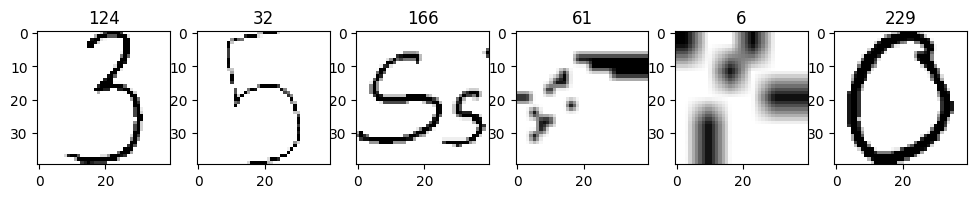

In [78]:
random_values = [random.randint(0, len(my_letters_df)-1) for i in range(6)]

fig, ax = plt.subplots(nrows=1, ncols=6, figsize=(12, 5))

ax[0].imshow(cv2.imread(my_letters_df['path'].iloc[random_values[0]]))
ax[0].set_title(str(random_values[0]))
ax[1].imshow(cv2.imread(my_letters_df['path'].iloc[random_values[1]]))
ax[1].set_title(str(random_values[1]))
ax[2].imshow(cv2.imread(my_letters_df['path'].iloc[random_values[2]]))
ax[2].set_title(str(random_values[2]))
ax[3].imshow(cv2.imread(my_letters_df['path'].iloc[random_values[3]]))
ax[3].set_title(str(random_values[3]))
ax[4].imshow(cv2.imread(my_letters_df['path'].iloc[random_values[4]]))
ax[4].set_title(str(random_values[4]))
ax[5].imshow(cv2.imread(my_letters_df['path'].iloc[random_values[5]]))
ax[5].set_title(str(random_values[5]))

In [79]:
word = [label_index[best_model.predict(cv2.split(cv2.imread(my_letters_df['path'].iloc[random_values[0]]))[0].reshape(1, 40,40,1)/255).argmax()], 
label_index[best_model.predict(cv2.split(cv2.imread(my_letters_df['path'].iloc[random_values[1]]))[0].reshape(1, 40,40,1)/255).argmax()],
label_index[best_model.predict(cv2.split(cv2.imread(my_letters_df['path'].iloc[random_values[2]]))[0].reshape(1, 40,40,1)/255).argmax()],
label_index[best_model.predict(cv2.split(cv2.imread(my_letters_df['path'].iloc[random_values[3]]))[0].reshape(1, 40,40,1)/255).argmax()],
label_index[best_model.predict(cv2.split(cv2.imread(my_letters_df['path'].iloc[random_values[4]]))[0].reshape(1, 40,40,1)/255).argmax()],
label_index[best_model.predict(cv2.split(cv2.imread(my_letters_df['path'].iloc[random_values[5]]))[0].reshape(1, 40,40,1)/255).argmax()]]
print(word)

1/1 [==============================] - 0s 21ms/step
['3', 'i/l/1', 's', 'j', 'i/l/1', 'o']
